In [52]:
using Pkg; Pkg.activate("../../../FermiCG/")
using FermiCG
using PyCall
using Plots
using LinearAlgebra
using Printf
using JLD2

  Activating project at `~/code/FermiCG`


In [53]:
#molecule = "
#He 0.00000000 0.00000000 0.00000000
#He 1.41421356 0.00000000 0.00000000
#He 0.00000000 1.41421356 0.00000000
#He 1.41421356 1.41421356 0.00000000
#He 0.70710678 0.70710678 1.00000000
#He 0.70710678 0.70710678 -1.00000000
#"
#molecule = "
#He 0.00000000 0.00000000 0.00000000
#He 2.12132035 0.00000000 0.00000000
#He 0.00000000 2.12132035 0.00000000
#He 2.12132034 2.12132034 0.00000000
#He 1.06066017 1.06066017 1.50000000
#He 1.06066017 1.06066017 -1.50000000
#"
molecule = "
He       0.0000000000000000       0.0000000000000000       0.0000000000000000
He       3.8890872900000004       0.0000000000000000       0.0000000000000000
He       0.0000000000000000       3.8890872900000004       0.0000000000000000
He       3.8890872900000004       3.8890872900000004       0.0000000000000000
He       1.9445436450000002       1.9445436450000002       2.7500000000000000
He       1.9445436450000002       1.9445436450000002      -2.7500000000000000
"
atoms = []
for (li,line) in enumerate(split(rstrip(lstrip(molecule)), "\n"))
    l = split(line)
    push!(atoms, Atom(li, l[1], parse.(Float64,l[2:4])))
end

basis = "aug-cc-pvdz"

# Create FermiCG.Molecule type
mol     = Molecule(0, 1, atoms,basis);

pyscf = pyimport("pyscf")

n_steps = 35
step_size = .05

pymol_init = pyscf.gto.Mole(atom=molecule,
                            symmetry = false, spin =0,charge=0,
                            basis = basis)
pymol_init.build()

PyObject <pyscf.gto.mole.Mole object at 0x7fe9b14f7e90>

In [58]:
io = open("traj.xyz", "w");
energies_ground = []
energies_t1 = []
energies_t2 = []
energies_t3 = []
energies_t4 = []
energies_t5 = []
energies_t6 = []

energies_s1 = []
energies_s2 = []
energies_s3 = []
energies_s4 = []
energies_s5 = []
energies_s6 = []

energies_t7 = []
energies_t8 = []
energies_t9 = []
energies_t10 = []
energies_t11 = []
energies_t12 = []
pt2_energies = []

lo = pyimport("pyscf.lo.orth")
tools = pyimport("pyscf.tools")
fcidump = pyimport("pyscf.tools.fcidump");

converged SCF energy = -17.1342346844178
  0.000318 seconds (32 allocations: 24.375 KiB)


54×54 Matrix{Float64}:
  1.25094      -0.548434      0.130776     …   0.00398664   -0.00494154
 -0.548434      1.6929       -0.697093        -0.0182469     0.0224388
  0.130776     -0.697093      1.43513          0.0284768    -0.0341754
 -0.000669867   0.00297177   -0.00505524      -0.000549512   0.00121046
 -0.000669867   0.00297177   -0.00505524      -0.00129305    0.00121046
 -1.37837e-16   1.03e-16      1.04359e-17  …   0.00145286   -0.0018254
  0.00175584   -0.00833794    0.0152577        0.00132998   -0.0031961
  0.00175584   -0.00833794    0.0152577        0.00377265   -0.0031961
 -5.63726e-17  -1.04913e-16   1.71342e-16     -0.00403345    0.00510262
 -0.000761914   0.00437246   -0.0101883        0.00398664   -0.00494154
  0.00437246   -0.0241489     0.0546893    …  -0.0182469     0.0224388
 -0.0101883     0.0546893    -0.118644         0.0284768    -0.0341754
 -0.00261235    0.0107583    -0.0150064        0.000549512  -0.00121046
  ⋮                                        ⋱    

54×54 Matrix{Float64}:
  1.0           3.79737e-15   1.16864e-15  …   2.34557e-15  -5.71136e-15
  3.46941e-15   1.0          -9.421e-16       -1.1616e-15    2.03117e-15
  1.1242e-15    1.5526e-17    1.0             -1.20868e-15   3.29566e-15
  8.37913e-15  -2.5455e-15   -3.94905e-15     -4.1205e-15    1.21523e-14
  8.0478e-15   -2.037e-15    -4.26626e-15     -4.35348e-15   1.02986e-14
 -2.41492e-16   1.2152e-16    8.78837e-17  …  -7.37067e-16  -3.0021e-16
 -5.57691e-15   4.0698e-15    3.50559e-15      4.68974e-15  -2.14769e-14
 -5.53554e-15   3.94091e-15   3.69018e-15      4.42907e-15  -2.34017e-14
 -1.5928e-16   -1.26851e-16   2.78667e-16     -5.81872e-16   3.37695e-16
 -1.07109e-15   1.00583e-15   6.38091e-16      1.47601e-15   2.12029e-17
  5.29689e-16  -2.84144e-16  -3.95263e-16  …  -1.08976e-15  -4.56584e-16
  5.52941e-16   2.27745e-16  -2.48345e-17     -7.27565e-16   4.87066e-17
 -5.48522e-15   3.15755e-15   3.39429e-15      6.96081e-15  -1.32255e-14
  ⋮                          

size of Lowdin ortho AO's:(54, 54)


LoadError: here

In [153]:
#pymol = deepcopy(pymol_init)
#scale = 1+1*step_size
#scale = 1
#move to smaller geometry
#xyz = @sprintf("%5i\n\n", length(mol.atoms))
#tmp = []

#for a in mol.atoms
#    push!(tmp, ["He", (a.xyz[1]/scale, a.xyz[2]/scale, a.xyz[3]/scale)])
#    xyz = xyz * @sprintf("%6s %24.16f %24.16f %24.16f \n", a.symbol, a.xyz[1]/scale, a.xyz[2]/scale, a.xyz[3]/scale)
#end

#pymol.atom = tmp
#pymol.build()

#mf = pyscf.scf.RHF(pymol).run()
#@time s = mf.get_ovlp(pymol)
#@time s2 = pymol.intor_symmetric("int1e_ovlp")
#lo_ao = lo.orth_ao(mf, "lowdin", pre_orth_ao=nothing)

#tools.fcidump.from_mo(pymol, "fcidump.he06_oct", lo_ao)

#Can just read in pyscf dump file for integrals (once you have already run an scf calculation)
#ctx = fcidump.read("fcidump.he06_oct");
#h = ctx["H1"];
#g = ctx["H2"];
#ecore = ctx["ECORE"];
#g = pyscf.ao2mo.restore("1", g, size(h,2))

#This one below was not working. Error: setfield! immutable struct of type InCoreInts cannot be changed
#ints = InCoreInts(ecore,h,g);

#Define clusters and intial Fock space for inital CMF calc for 9 orbs each He
#clusters_in = [(1:9),(10:18), (19:27), (28:36), (37:45), (46:54)]

#Define clusters and intial Fock space for inital CMF calc for 5 orbs each He
#init_fspace = [(1,1),(1,1),(1,1),(1,1),(1,1),(1,1)]
#rdm1 = zeros(size(ints.h1))
#na=6
#nb=6

#Define clusters now using FermiCG code
#clusters = [Cluster(i,collect(clusters_in[i])) for i = 1:length(clusters_in)]
#display(clusters)
        
#do a CMF calculation to optimize cluster orbitals
#e_cmf, U, Da, Db = FermiCG.cmf_oo(ints, clusters, init_fspace, rdm1, rdm1, max_iter_oo=100, verbose=0, gconv=1e-6, method="bfgs", sequential=true);
#FermiCG.pyscf_write_molden(mol,lo_ao*U, filename="cmf.molden");

#U_old = U
#C_old = lo_ao*U
#lo_ao_old = lo_ao
#@save "start_var.jld2" U_old C_old lo_ao_old
@load "start_var.jld2"
Da_old = zeros(size(ints.h1))
Db_old = zeros(size(ints.h1))

for R in 1:n_steps
    println("\n*********** Iteration: ", R, " *************")
    #pymol = deepcopy(pymol_init)
    scale = 1+R*step_size
    #scale = 1
    
    #move to smaller geometry
    xyz = @sprintf("%5i\n\n", length(mol.atoms))
    tmp = []
    for a in mol.atoms
        push!(tmp, ["He", (a.xyz[1]/scale, a.xyz[2]/scale, a.xyz[3]/scale)])
        xyz = xyz * @sprintf("%6s %24.16f %24.16f %24.16f \n", a.symbol, a.xyz[1]/scale, a.xyz[2]/scale, a.xyz[3]/scale)
    end
    
    #move to larger geometry
    #for a in mol.atoms
    #    push!(tmp, ["He", (a.xyz[1]*scale, a.xyz[2]*scale, a.xyz[3]*scale)])
    #    xyz = xyz * @sprintf("%6s %24.16f %24.16f %24.16f \n", a.symbol, a.xyz[1]*scale, a.xyz[2]*scale, a.xyz[3]*scale)
    #end
    
    pymol.atom = tmp
    pymol.build()
    println(xyz)
    write(io, xyz);

    mf = pyscf.scf.RHF(pymol).run()
    s = mf.get_ovlp(pymol)
    
    lo_ao = lo.lowdin(s)
    C_new = lo_ao*U_old
    #println("size of Lowdin ortho AO's:", size(lo_ao))
    
    #val, vec = eigen(s)
    #values = Diagonal(val.^(-1/2))
    #S_half  = vec*values*vec'
    
    #write fci dump file from the modified mo coefficients
    tools.fcidump.from_mo(pymol, "fcidump.he06_oct", C_new)
    
    #Can just read in pyscf dump file for integrals (once you have already run an scf calculation)
    ctx = fcidump.read("fcidump.he06_oct");
    h = ctx["H1"];
    g = ctx["H2"];
    ecore = ctx["ECORE"];
    g = pyscf.ao2mo.restore("1", g, size(h,2))

    #This one below was not working. Error: setfield! immutable struct of type InCoreInts cannot be changed
    ints = InCoreInts(ecore,h,g);
    
    #Define clusters and intial Fock space for inital CMF calc for 9 orbs each He
    clusters_in = [(1:9),(10:18), (19:27), (28:36), (37:45), (46:54)]

    #Define clusters and intial Fock space for inital CMF calc for 5 orbs each He
    init_fspace = [(1,1),(1,1),(1,1),(1,1),(1,1),(1,1)]
    rdm1 = zeros(size(ints.h1))
    na=6
    nb=6

    #Define clusters now using FermiCG code
    clusters = [Cluster(i,collect(clusters_in[i])) for i = 1:length(clusters_in)]
    #display(clusters)
        
    #do a CMF calculation to optimize cluster orbitals
    e_cmf, U, Da, Db = FermiCG.cmf_oo(ints, clusters, init_fspace, Da_old, Db_old, max_iter_oo=200, verbose=0, gconv=1e-6, method="bfgs", sequential=true);
    #FermiCG.pyscf_write_molden(mol,lo_ao*U, filename="cmf.molden");
    
    U_old = U
    #C_old = tmp_orb*U
    lo_ao_old = lo_ao
    Da_old = Da
    Db_old = Db
    #rotate the integrals by the cmf calculation
    ints = FermiCG.orbital_rotation(ints, U);
    max_roots = 40

    #Build Cluster Basis (delta n is here)
    cluster_bases = FermiCG.compute_cluster_eigenbasis(ints, clusters, delta_elec=2, verbose=1, max_roots=max_roots, init_fspace=init_fspace, rdm1a=Da, rdm1b=Db);

    #@save "scan_after_cmf.jld2" ints Da Db e_cmf cluster_bases clusters init_fspace

    #Build Clustered Operator
    cluster_ham = FermiCG.extract_ClusteredTerms(ints, clusters);
    
    #Build Cluster Operators
    cluster_ops = FermiCG.compute_cluster_ops(cluster_bases, ints);
    FermiCG.add_cmf_operators!(cluster_ops, cluster_bases, ints, Da, Db);
    
    #Need to find reference state 
    ref_fock = FermiCG.FockConfig(init_fspace)
    nroots = 19
    #ci_vector = FermiCG.TPSCIstate(clusters, ref_fock, R=nroots)
    ci_vector = FermiCG.TPSCIstate(clusters, FermiCG.FockConfig(init_fspace), R=nroots);
    #ci_vector = FermiCG.ClusteredState(clusters, ref_fock, R=nroots);
    #Need to find the automated way to define these other excited configs away from ref state, example is to large
    #to do by hand
    #probably something to do with building p spaces and q spaces
    
    ci_vector[ref_fock][ClusterConfig([1,1,1,1,1,1])] = zeros(Float64,nroots)
    ci_vector[ref_fock][ClusterConfig([2,1,1,1,1,1])] = zeros(Float64,nroots)
    ci_vector[ref_fock][ClusterConfig([1,2,1,1,1,1])] = zeros(Float64,nroots)
    ci_vector[ref_fock][ClusterConfig([1,1,2,1,1,1])] = zeros(Float64,nroots)
    ci_vector[ref_fock][ClusterConfig([1,1,1,2,1,1])] = zeros(Float64,nroots)
    ci_vector[ref_fock][ClusterConfig([1,1,1,1,2,1])] = zeros(Float64,nroots)
    ci_vector[ref_fock][ClusterConfig([1,1,1,1,1,2])] = zeros(Float64,nroots)
    
    ci_vector[ref_fock][ClusterConfig([3,1,1,1,1,1])] = zeros(Float64,nroots)
    ci_vector[ref_fock][ClusterConfig([1,3,1,1,1,1])] = zeros(Float64,nroots)
    ci_vector[ref_fock][ClusterConfig([1,1,3,1,1,1])] = zeros(Float64,nroots)
    ci_vector[ref_fock][ClusterConfig([1,1,1,3,1,1])] = zeros(Float64,nroots)
    ci_vector[ref_fock][ClusterConfig([1,1,1,1,3,1])] = zeros(Float64,nroots)
    ci_vector[ref_fock][ClusterConfig([1,1,1,1,1,3])] = zeros(Float64,nroots)
    
    ci_vector[ref_fock][ClusterConfig([4,1,1,1,1,1])] = zeros(Float64,nroots)
    ci_vector[ref_fock][ClusterConfig([1,4,1,1,1,1])] = zeros(Float64,nroots)
    ci_vector[ref_fock][ClusterConfig([1,1,4,1,1,1])] = zeros(Float64,nroots)
    ci_vector[ref_fock][ClusterConfig([1,1,1,4,1,1])] = zeros(Float64,nroots)
    ci_vector[ref_fock][ClusterConfig([1,1,1,1,4,1])] = zeros(Float64,nroots)
    ci_vector[ref_fock][ClusterConfig([1,1,1,1,1,4])] = zeros(Float64,nroots)

    FermiCG.eye!(ci_vector)
    #display(ci_vector)

    #for thresh_cipsi in thresh_list
    e0, v0 = FermiCG.tpsci_ci(ci_vector, cluster_ops, cluster_ham,
                              thresh_cipsi=1e-3, # Threshold for adding to P-space
                              #thresh_cipsi=thresh_cipsi, # Threshold for adding to P-space
                              thresh_foi=1e-2,    # Threshold for keeping terms when defining FOIS
                              thresh_asci=1e-1,     # Threshold of P-space configs to search from
                              max_iter=10);

    @time e2 = FermiCG.compute_pt2_energy(v0, cluster_ops, cluster_ham, thresh_foi=1e-8)
    #name = "eq_tpsci_results"*string(0.001)*".jld2"
    #@save name e0 e2 v0 ecore
    
    println()
    println("	*======TPSCI results======*")
    @printf("TCI Thresh: %8.6f  Dim:%8d\n",1e-2,size(v0)[1])
    println()
    @printf("TCI %5s %12s %12s\n", "Root", "E(0)", "E(2)") 
    for r in 1:nroots
        @printf("TCI %5s %12.8f %12.8f\n",r, e0[r] + ecore, e0[r] + e2[r] + ecore)
        display(v0,thresh=1e-4,root=r)
    end
    #end
    
    push!(energies_ground, e0[1]+ecore)
    push!(energies_t1, e0[2]+ecore)
    push!(energies_t2, e0[3]+ecore)
    push!(energies_t3, e0[4]+ecore)
    push!(energies_t4, e0[5]+ecore)
    push!(energies_t5, e0[6]+ecore)
    push!(energies_t6, e0[7]+ecore)
    
    push!(energies_s1, e0[8]+ecore)
    push!(energies_s2, e0[9]+ecore)
    push!(energies_s3, e0[10]+ecore)
    push!(energies_s4, e0[11]+ecore)
    push!(energies_s5, e0[12]+ecore)
    push!(energies_s6, e0[13]+ecore)

    push!(energies_t7, e0[14]+ecore)
    push!(energies_t8, e0[15]+ecore)
    push!(energies_t9, e0[16]+ecore)
    push!(energies_t10, e0[17]+ecore)
    push!(energies_t11, e0[18]+ecore)
    push!(energies_t12, e0[19]+ecore)

    push!(pt2_energies, e2)
end


*********** Iteration: 1 *************
    6

    He       0.0000000000000000       0.0000000000000000       0.0000000000000000 
    He       3.7038926571428572       0.0000000000000000       0.0000000000000000 
    He       0.0000000000000000       3.7038926571428572       0.0000000000000000 
    He       3.7038926571428572       3.7038926571428572       0.0000000000000000 
    He       1.8519463285714286       1.8519463285714286       2.6190476190476191 
    He       1.8519463285714286       1.8519463285714286      -2.6190476190476191 

Parsing fcidump.he06_oct
converged SCF energy = -17.1342375747563
 ooCMF Iter:    1 Total= -17.337082689448 Active= -25.407166357042 G=     4.96e-02
 ooCMF Iter:    2 Total= -17.337274429837 Active= -25.407358097431 G=     2.51e-02
 ooCMF Iter:    3 Total= -17.337319141528 Active= -25.407402809123 G=     8.80e-03
 ooCMF Iter:    4 Total= -17.337322167694 Active= -25.407405835288 G=     1.74e-03
 ooCMF Iter:    5 Total= -17.337322620226 Active= -25.40

 * Status: success

 * Candidate solution
    Final objective value:     -1.733733e+01

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 6.78e-07 ≰ 0.0e+00
    |x - x'|/|x'|          = 1.58e-04 ≰ 0.0e+00
    |f(x) - f(x')|         = 7.45e-12 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 4.30e-13 ≰ 0.0e+00
    |g(x)|                 = 7.76e-07 ≤ 1.0e-06

 * Work counters
    Seconds run:   58  (vs limit Inf)
    Iterations:    25
    f(x) calls:    56
    ∇f(x) calls:   56


*ooCMF -17.33733231 
IDX001:DIM262144:001|002|003|004|005|006|007|008|009|
 Number of embedded electrons a,b: 5.000000 5.000000 FCIProblem:: #Orbs = 9   #α = 0  #β = 0  Dimension: 1        
   State    1 Energy:   0.00000000   8.07008367
 FCIProblem:: #Orbs = 9   #α = 0  #β = 1  Dimension: 9        
   State    1 Energy:  -1.99440621   6.07567745
   State    2 Energy:  -0.48208995   7.58799371
   State    3 Energy:  -0.45881618   7.61126749
   State    4 Energy:  -0.45881618   7.61126749
   State    5 Energy:  -0.45101265   7.61907102
   State    6 Energy:   0.37958678   8.44967044
   State    7 Energy:   1.36847406   9.43855772
   State    8 Energy:   1.36847406   9.43855772
   State    9 Energy:   1.37302608   9.44310975
 FCIProblem:: #Orbs = 9   #α = 0  #β = 2  Dimension: 36       
   State    1 Energy:  -2.12580869   5.94427498
   State    2 Energy:  -1.95161047   6.11847320
   State    3 Energy:  -1.95161047   6.11847320
   State    4 Energy:  -1.94738995   6.12269372
   State    

 FCIProblem:: #Orbs = 9   #α = 2  #β = 0  Dimension: 36       
   State    1 Energy:  -2.12580869   5.94427498
   State    2 Energy:  -1.95161047   6.11847320
   State    3 Energy:  -1.95161047   6.11847320
   State    4 Energy:  -1.94738995   6.12269372
   State    5 Energy:  -1.01664111   7.05344256
   State    6 Energy:  -0.64828555   7.42179812
   State    7 Energy:  -0.64828555   7.42179812
   State    8 Energy:  -0.64446530   7.42561837
   State    9 Energy:  -0.52293921   7.54714446
   State   10 Energy:  -0.51907749   7.55100617
   State   11 Energy:  -0.51907749   7.55100617
   State   12 Energy:   0.15293889   8.22302256
   State   13 Energy:   0.15293889   8.22302256
   State   14 Energy:   0.15693440   8.22701807
   State   15 Energy:   0.18248585   8.25256952
   State   16 Energy:   0.33064940   8.40073307
   State   17 Energy:   0.33064940   8.40073307
   State   18 Energy:   0.33334849   8.40343216
   State   19 Energy:   1.23275175   9.30283542
   State   20 Energy:   1

 FCIProblem:: #Orbs = 9   #α = 0  #β = 2  Dimension: 36       
   State    1 Energy:  -2.12580869   5.94427498
   State    2 Energy:  -1.95161047   6.11847320
   State    3 Energy:  -1.95161047   6.11847320
   State    4 Energy:  -1.94738995   6.12269372
   State    5 Energy:  -1.01664111   7.05344255
   State    6 Energy:  -0.64828555   7.42179812
   State    7 Energy:  -0.64828555   7.42179812
   State    8 Energy:  -0.64446530   7.42561837
   State    9 Energy:  -0.52293921   7.54714446
   State   10 Energy:  -0.51907750   7.55100617
   State   11 Energy:  -0.51907750   7.55100617
   State   12 Energy:   0.15293889   8.22302256
   State   13 Energy:   0.15293889   8.22302256
   State   14 Energy:   0.15693440   8.22701807
   State   15 Energy:   0.18248585   8.25256952
   State   16 Energy:   0.33064940   8.40073307
   State   17 Energy:   0.33064940   8.40073307
   State   18 Energy:   0.33334849   8.40343216
   State   19 Energy:   1.23275175   9.30283542
   State   20 Energy:   1

 FCIProblem:: #Orbs = 9   #α = 2  #β = 0  Dimension: 36       
   State    1 Energy:  -2.12580869   5.94427498
   State    2 Energy:  -1.95161047   6.11847320
   State    3 Energy:  -1.95161047   6.11847320
   State    4 Energy:  -1.94738995   6.12269372
   State    5 Energy:  -1.01664111   7.05344255
   State    6 Energy:  -0.64828555   7.42179812
   State    7 Energy:  -0.64828555   7.42179812
   State    8 Energy:  -0.64446530   7.42561837
   State    9 Energy:  -0.52293921   7.54714446
   State   10 Energy:  -0.51907750   7.55100617
   State   11 Energy:  -0.51907750   7.55100617
   State   12 Energy:   0.15293889   8.22302256
   State   13 Energy:   0.15293889   8.22302256
   State   14 Energy:   0.15693440   8.22701807
   State   15 Energy:   0.18248585   8.25256952
   State   16 Energy:   0.33064940   8.40073307
   State   17 Energy:   0.33064940   8.40073307
   State   18 Energy:   0.33334849   8.40343216
   State   19 Energy:   1.23275175   9.30283542
   State   20 Energy:   1

 FCIProblem:: #Orbs = 9   #α = 0  #β = 2  Dimension: 36       
   State    1 Energy:  -2.12580869   5.94427498
   State    2 Energy:  -1.95161047   6.11847320
   State    3 Energy:  -1.95161047   6.11847320
   State    4 Energy:  -1.94738995   6.12269372
   State    5 Energy:  -1.01664111   7.05344255
   State    6 Energy:  -0.64828555   7.42179812
   State    7 Energy:  -0.64828555   7.42179812
   State    8 Energy:  -0.64446530   7.42561837
   State    9 Energy:  -0.52293921   7.54714445
   State   10 Energy:  -0.51907750   7.55100617
   State   11 Energy:  -0.51907750   7.55100617
   State   12 Energy:   0.15293889   8.22302256
   State   13 Energy:   0.15293889   8.22302256
   State   14 Energy:   0.15693440   8.22701807
   State   15 Energy:   0.18248585   8.25256951
   State   16 Energy:   0.33064940   8.40073307
   State   17 Energy:   0.33064940   8.40073307
   State   18 Energy:   0.33334849   8.40343215
   State   19 Energy:   1.23275175   9.30283542
   State   20 Energy:   1

 FCIProblem:: #Orbs = 9   #α = 2  #β = 0  Dimension: 36       
   State    1 Energy:  -2.12580869   5.94427498
   State    2 Energy:  -1.95161047   6.11847320
   State    3 Energy:  -1.95161047   6.11847320
   State    4 Energy:  -1.94738995   6.12269372
   State    5 Energy:  -1.01664111   7.05344255
   State    6 Energy:  -0.64828555   7.42179812
   State    7 Energy:  -0.64828555   7.42179812
   State    8 Energy:  -0.64446530   7.42561837
   State    9 Energy:  -0.52293921   7.54714445
   State   10 Energy:  -0.51907750   7.55100617
   State   11 Energy:  -0.51907750   7.55100617
   State   12 Energy:   0.15293889   8.22302256
   State   13 Energy:   0.15293889   8.22302256
   State   14 Energy:   0.15693440   8.22701807
   State   15 Energy:   0.18248585   8.25256951
   State   16 Energy:   0.33064940   8.40073307
   State   17 Energy:   0.33064940   8.40073307
   State   18 Energy:   0.33334849   8.40343215
   State   19 Energy:   1.23275175   9.30283542
   State   20 Energy:   1

 FCIProblem:: #Orbs = 9   #α = 0  #β = 2  Dimension: 36       
   State    1 Energy:  -2.12580869   5.94427498
   State    2 Energy:  -1.95161047   6.11847320
   State    3 Energy:  -1.95161047   6.11847320
   State    4 Energy:  -1.94738995   6.12269372
   State    5 Energy:  -1.01664112   7.05344255
   State    6 Energy:  -0.64828555   7.42179812
   State    7 Energy:  -0.64828555   7.42179812
   State    8 Energy:  -0.64446530   7.42561837
   State    9 Energy:  -0.52293921   7.54714445
   State   10 Energy:  -0.51907750   7.55100617
   State   11 Energy:  -0.51907750   7.55100617
   State   12 Energy:   0.15293889   8.22302256
   State   13 Energy:   0.15293889   8.22302256
   State   14 Energy:   0.15693440   8.22701806
   State   15 Energy:   0.18248585   8.25256951
   State   16 Energy:   0.33064940   8.40073307
   State   17 Energy:   0.33064940   8.40073307
   State   18 Energy:   0.33334849   8.40343215
   State   19 Energy:   1.23275175   9.30283541
   State   20 Energy:   1

 FCIProblem:: #Orbs = 9   #α = 2  #β = 0  Dimension: 36       
   State    1 Energy:  -2.12580869   5.94427498
   State    2 Energy:  -1.95161047   6.11847320
   State    3 Energy:  -1.95161047   6.11847320
   State    4 Energy:  -1.94738995   6.12269372
   State    5 Energy:  -1.01664112   7.05344255
   State    6 Energy:  -0.64828555   7.42179812
   State    7 Energy:  -0.64828555   7.42179812
   State    8 Energy:  -0.64446530   7.42561837
   State    9 Energy:  -0.52293921   7.54714445
   State   10 Energy:  -0.51907750   7.55100617
   State   11 Energy:  -0.51907750   7.55100617
   State   12 Energy:   0.15293889   8.22302256
   State   13 Energy:   0.15293889   8.22302256
   State   14 Energy:   0.15693440   8.22701806
   State   15 Energy:   0.18248585   8.25256951
   State   16 Energy:   0.33064940   8.40073307
   State   17 Energy:   0.33064940   8.40073307
   State   18 Energy:   0.33334849   8.40343215
   State   19 Energy:   1.23275175   9.30283541
   State   20 Energy:   1

 FCIProblem:: #Orbs = 9   #α = 0  #β = 2  Dimension: 36       
   State    1 Energy:  -2.12580866   5.94427500
   State    2 Energy:  -1.95161045   6.11847322
   State    3 Energy:  -1.95161045   6.11847322
   State    4 Energy:  -1.94738993   6.12269374
   State    5 Energy:  -1.01664109   7.05344258
   State    6 Energy:  -0.64828553   7.42179813
   State    7 Energy:  -0.64828553   7.42179813
   State    8 Energy:  -0.64446528   7.42561839
   State    9 Energy:  -0.52293919   7.54714447
   State   10 Energy:  -0.51907748   7.55100619
   State   11 Energy:  -0.51907748   7.55100619
   State   12 Energy:   0.15293892   8.22302258
   State   13 Energy:   0.15293892   8.22302258
   State   14 Energy:   0.15693442   8.22701809
   State   15 Energy:   0.18248586   8.25256953
   State   16 Energy:   0.33064942   8.40073309
   State   17 Energy:   0.33064942   8.40073309
   State   18 Energy:   0.33334851   8.40343218
   State   19 Energy:   1.23275177   9.30283544
   State   20 Energy:   1

 FCIProblem:: #Orbs = 9   #α = 2  #β = 0  Dimension: 36       
   State    1 Energy:  -2.12580866   5.94427500
   State    2 Energy:  -1.95161045   6.11847322
   State    3 Energy:  -1.95161045   6.11847322
   State    4 Energy:  -1.94738993   6.12269374
   State    5 Energy:  -1.01664109   7.05344258
   State    6 Energy:  -0.64828553   7.42179813
   State    7 Energy:  -0.64828553   7.42179813
   State    8 Energy:  -0.64446528   7.42561839
   State    9 Energy:  -0.52293919   7.54714447
   State   10 Energy:  -0.51907748   7.55100619
   State   11 Energy:  -0.51907748   7.55100619
   State   12 Energy:   0.15293892   8.22302258
   State   13 Energy:   0.15293892   8.22302258
   State   14 Energy:   0.15693442   8.22701809
   State   15 Energy:   0.18248586   8.25256953
   State   16 Energy:   0.33064942   8.40073309
   State   17 Energy:   0.33064942   8.40073309
   State   18 Energy:   0.33334851   8.40343218
   State   19 Energy:   1.23275177   9.30283544
   State   20 Energy:   1

 FCIProblem:: #Orbs = 9   #α = 0  #β = 2  Dimension: 36       
   State    1 Energy:  -2.12580866   5.94427500
   State    2 Energy:  -1.95161045   6.11847322
   State    3 Energy:  -1.95161045   6.11847322
   State    4 Energy:  -1.94738993   6.12269374
   State    5 Energy:  -1.01664109   7.05344258
   State    6 Energy:  -0.64828553   7.42179813
   State    7 Energy:  -0.64828553   7.42179813
   State    8 Energy:  -0.64446528   7.42561839
   State    9 Energy:  -0.52293920   7.54714447
   State   10 Energy:  -0.51907748   7.55100619
   State   11 Energy:  -0.51907748   7.55100619
   State   12 Energy:   0.15293891   8.22302258
   State   13 Energy:   0.15293891   8.22302258
   State   14 Energy:   0.15693442   8.22701809
   State   15 Energy:   0.18248586   8.25256953
   State   16 Energy:   0.33064942   8.40073309
   State   17 Energy:   0.33064942   8.40073309
   State   18 Energy:   0.33334851   8.40343217
   State   19 Energy:   1.23275177   9.30283544
   State   20 Energy:   1

 FCIProblem:: #Orbs = 9   #α = 2  #β = 0  Dimension: 36       
   State    1 Energy:  -2.12580866   5.94427500
   State    2 Energy:  -1.95161045   6.11847322
   State    3 Energy:  -1.95161045   6.11847322
   State    4 Energy:  -1.94738993   6.12269374
   State    5 Energy:  -1.01664109   7.05344258
   State    6 Energy:  -0.64828553   7.42179813
   State    7 Energy:  -0.64828553   7.42179813
   State    8 Energy:  -0.64446528   7.42561839
   State    9 Energy:  -0.52293920   7.54714447
   State   10 Energy:  -0.51907748   7.55100619
   State   11 Energy:  -0.51907748   7.55100619
   State   12 Energy:   0.15293891   8.22302258
   State   13 Energy:   0.15293891   8.22302258
   State   14 Energy:   0.15693442   8.22701809
   State   15 Energy:   0.18248586   8.25256953
   State   16 Energy:   0.33064942   8.40073309
   State   17 Energy:   0.33064942   8.40073309
   State   18 Energy:   0.33334851   8.40343217
   State   19 Energy:   1.23275177   9.30283544
   State   20 Energy:   1


 |== Tensor Product State CI =======================================
 Hamiltonian matrix dimension =    19: 
 Build full Hamiltonian matrix with dimension:       0.004560 seconds (68.36 k allocations: 1.976 MiB)
 Now diagonalize
 Diagonalization time:                               0.000109 seconds
(19, 19)(19, 19)
 Compute S2 expectation values:                      0.000616 seconds (37.59 k allocations: 1.126 MiB)
  Root       Energy           S2
     1 -25.40741598   0.00000000
     2 -24.64372366   2.00000000
     3 -24.64367241   2.00000000
     4 -24.64367241   2.00000000
     5 -24.64367239   2.00000000
     6 -24.64364666   2.00000000
     7 -24.64364664   2.00000000
     8 -24.58080363   0.00000000
     9 -24.58080362   0.00000000
    10 -24.58078818   0.00000000
    11 -24.58078818   0.00000000
    12 -24.58078817   0.00000000
    13 -24.58064292   0.00000000
    14 -24.46947659   2.00000000
    15 -24.46947427   2.00000000
    16 -24.46947421   2.00000000
    17 -24.46947406

 Compute matrix-vector:                              0.636157 seconds (1.85 M allocations: 93.121 MiB)
 Now collect thread results :                        0.003078 seconds (21.34 k allocations: 2.009 MiB)
 Length of FOIS vector: 685
 Compute diagonal:                                 
  Root         E(0)         E(2)
     1 -25.40743030 -25.47816415
     2 -24.99501177 -25.38595373
     3 -24.99327636 -25.37994802
     4 -24.99496482 -25.38716118
     5 -24.99258579 -25.37868065
     6 -24.99257078 -25.37864643
     7 -24.99181330 -25.37752020
     8 -25.38685268 -26.23294777
     9 -25.38411218 -26.22467765
    10 -25.38214883 -26.22304832
    11 -25.37834446 -26.21302485
    12 -25.37825647 -26.21284956
    13 -25.35896816 -26.17427744
    14 -24.78640920 -25.10188852
    15 -24.78633220 -25.10174015
    16 -24.78518582 -25.09955317
    17 -24.78493199 -25.09905896
    18 -24.78483888 -25.09887628
    19 -24.78183596 -25.09313758
 Length of PT1  vector      685 →      616 
 TPSCI Ite

 Iter:  14 SS: 171  E:  -25.40741877*  -24.66625619*  -24.66612620*  -24.66611125*  -24.66593798*  -24.66593677*  -24.66560128*  -24.61414154*  -24.61402401*  -24.61372584*  -24.61351517*  -24.61351192*  -24.61314989*  -24.52915609   -24.52915269   -24.52380842*  -24.52375844*  -24.52375713*  -24.52368761*  R: 2.6e-06* 2.9e-07* 3.8e-06* 1.2e-06* 3.6e-06* 3.7e-06* 3.8e-06* 7.2e-06* 8.2e-06* 8.7e-06* 8.0e-06* 8.0e-06* 9.2e-06* 1.4e-04  6.0e-05  3.9e-06* 3.0e-06* 3.1e-06* 1.8e-06*  LinDep: 4.7e-14* 
 Iter:  15 SS: 173  E:  -25.40741877*  -24.66625619*  -24.66612620*  -24.66611125*  -24.66593799*  -24.66593676*  -24.66560128*  -24.61414154*  -24.61402401*  -24.61372584*  -24.61351517*  -24.61351192*  -24.61314989*  -24.52915613   -24.52915270   -24.52380842*  -24.52375846*  -24.52375712*  -24.52368761*  R: 2.6e-06* 3.1e-07* 3.8e-06* 1.2e-06* 3.6e-06* 3.7e-06* 3.8e-06* 7.2e-06* 8.2e-06* 8.7e-06* 8.0e-06* 8.0e-06* 9.2e-06* 1.1e-04  7.2e-05  3.9e-06* 3.1e-06* 3.1e-06* 2.1e-06*  LinDep: 4.4e-1

 Compute matrix-vector:                              0.575820 seconds (1.86 M allocations: 95.656 MiB)
 Now collect thread results :                        0.003205 seconds (21.34 k allocations: 2.009 MiB)
 Length of FOIS vector: 779
 Compute diagonal:                                 
  Root         E(0)         E(2)
     1 -25.40743477 -25.46651736
     2 -24.99680749 -25.38836938
     3 -24.99416815 -25.38109459
     4 -24.99688482 -25.38944935
     5 -24.99348922 -25.37995892
     6 -24.99347364 -25.37973351
     7 -24.99285236 -25.37908363
     8 -25.27870441 -26.01181853
     9 -25.25820600 -25.96573548
    10 -25.38518790 -26.22591474
    11 -25.37940476 -26.21427062
    12 -25.37931671 -26.21409277
    13 -25.34631926 -26.14813214
    14 -24.86484712 -25.25458021
    15 -24.86472870 -25.25288783
    16 -24.78730363 -25.10350465
    17 -24.78584788 -25.13738172
    18 -24.78595002 -25.10092350
    19 -24.78427349 -25.09770687
 Length of PT1  vector      779 →      677 
 TPSCI Ite

 Iter:  14 SS: 171  E:  -25.40743565*  -24.66636784*  -24.66623277*  -24.66617069*  -24.66601986*  -24.66593639*  -24.66564795*  -24.61458077   -24.61447457   -24.61398687   -24.61391519   -24.61351940*  -24.61330953   -24.53280219   -24.53279631   -24.52915463   -24.52913933   -24.52375691*  -24.52374676*  R: 1.1e-06* 1.1e-06* 1.6e-06* 1.5e-06* 1.7e-06* 2.3e-06* 2.1e-06* 1.2e-05  2.0e-05  2.1e-05  1.7e-05  6.8e-06* 1.3e-05  5.4e-05  4.4e-05  5.0e-05  9.4e-05  8.2e-06* 4.7e-06*  LinDep: 2.0e-11* 
 Iter:  15 SS: 179  E:  -25.40743565*  -24.66636784*  -24.66623277*  -24.66617069*  -24.66601986*  -24.66593639*  -24.66564795*  -24.61458077   -24.61447458   -24.61398687   -24.61391519*  -24.61351940*  -24.61330953*  -24.53280219   -24.53279631   -24.52915463   -24.52913933   -24.52375691*  -24.52374676*  R: 9.7e-07* 8.1e-07* 1.1e-06* 1.5e-06* 1.7e-06* 2.2e-06* 2.1e-06* 1.0e-05  1.2e-05  1.2e-05  9.7e-06* 6.7e-06* 8.1e-06* 2.9e-05  2.1e-05  3.3e-05  6.4e-05  8.2e-06* 4.6e-06*  LinDep: 2.0e-1

 Compute matrix-vector:                              0.599880 seconds (2.00 M allocations: 102.710 MiB)
 Now collect thread results :                        0.003407 seconds (21.34 k allocations: 2.009 MiB)
 Length of FOIS vector: 806
 Compute diagonal:                                 
  Root         E(0)         E(2)
     1 -25.40755697 -25.44343492
     2 -25.00120059 -25.39560682
     3 -25.00191446 -25.39732345
     4 -24.99489679 -25.38051674
     5 -24.99464512 -25.38082736
     6 -24.99347530 -25.37857522
     7 -24.99391671 -25.38032303
     8 -25.16044699 -25.76840742
     9 -25.14446986 -25.73107690
    10 -25.28707494 -26.02594343
    11 -25.25356090 -25.95459693
    12 -25.37949679 -26.21293002
    13 -25.32483189 -26.10152447
    14 -25.01109573 -25.54024507
    15 -25.01128857 -25.54042064
    16 -24.86441956 -25.26523523
    17 -24.86455999 -25.25211286
    18 -24.78595550 -25.09951644
    19 -24.78576313 -25.09915610
 Length of PT1  vector      806 →      701 
 TPSCI It

 Iter:  14 SS: 109  E:  -25.40745972*  -24.66639722*  -24.66623299*  -24.66623110*  -24.66614286*  -24.66593694*  -24.66568156*  -24.61467818   -24.61449008*  -24.61437377   -24.61430075   -24.61353427*  -24.61338697*  -24.53299664   -24.53279831*  -24.53279520   -24.53258149   -24.52375797*  -24.52374756*  R: 2.9e-06* 1.7e-06* 2.0e-06* 2.1e-06* 1.7e-06* 1.5e-06* 1.8e-06* 1.9e-05  5.1e-06* 4.0e-05  2.4e-05  9.0e-06* 9.9e-06* 6.4e-05  7.9e-06* 1.2e-04  6.1e-05  5.3e-06* 5.1e-06*  LinDep: 7.3e-15* 
 Iter:  15 SS: 113  E:  -25.40745972*  -24.66639722*  -24.66623302*  -24.66623107*  -24.66614286*  -24.66593694*  -24.66568156*  -24.61467818   -24.61449008*  -24.61437377   -24.61430075   -24.61353427*  -24.61338697*  -24.53299664   -24.53279831*  -24.53279522   -24.53258149   -24.52375797*  -24.52374756*  R: 2.9e-06* 1.6e-06* 2.1e-06* 2.1e-06* 9.2e-07* 1.5e-06* 1.7e-06* 1.3e-05  4.7e-06* 2.7e-05  1.9e-05  8.8e-06* 9.4e-06* 3.5e-05  7.7e-06* 7.3e-05  3.5e-05  5.3e-06* 4.9e-06*  LinDep: 7.3e-1

 Compute matrix-vector:                              0.625634 seconds (2.00 M allocations: 102.723 MiB)
 Now collect thread results :                        0.003425 seconds (21.34 k allocations: 2.009 MiB)
 Length of FOIS vector: 826
 Compute diagonal:                                 
  Root         E(0)         E(2)
     1 -25.40773145 -25.44375307
     2 -25.00209758 -25.39790850
     3 -24.99790918 -25.39039561
     4 -25.00189825 -25.39638873
     5 -24.99978997 -25.39079564
     6 -24.99347653 -25.37796653
     7 -24.99517427 -25.38252230
     8 -25.19159796 -25.83507951
     9 -25.14437358 -25.72687546
    10 -25.26952861 -25.98417645
    11 -25.26184340 -25.96950749
    12 -25.37980842 -26.21225089
    13 -25.34589578 -26.14381109
    14 -25.01446817 -25.55495649
    15 -25.01150528 -25.54070207
    16 -25.01080616 -25.55086105
    17 -25.00727887 -25.53103027
    18 -24.78595629 -25.09816220
    19 -24.78579265 -25.09792837
 Length of PT1  vector      826 →      720 
 TPSCI It

 Compute matrix-vector:                              0.582986 seconds (2.00 M allocations: 102.651 MiB)
 Now collect thread results :                        0.003120 seconds (21.34 k allocations: 2.009 MiB)
 Length of FOIS vector: 826
 Compute diagonal:                                 
  Root         E(0)         E(2)
     1 -25.40773145 -25.44375386
     2 -25.00209790 -25.39493527
     3 -24.99789540 -25.38779396
     4 -25.00191338 -25.39359305
     5 -24.99979060 -25.38791600
     6 -24.99347834 -25.37521026
     7 -24.99517473 -25.37982837
     8 -25.19160227 -25.83030146
     9 -25.14437359 -25.72351004
    10 -25.26944135 -25.97975842
    11 -25.26192625 -25.96555763
    12 -25.37980842 -26.20736764
    13 -25.34589583 -26.13886156
    14 -25.01448917 -25.55123391
    15 -25.01152450 -25.53765861
    16 -25.01082124 -25.54693310
    17 -25.00729255 -25.52822036
    18 -24.78597739 -25.09637036
    19 -24.78581176 -25.09638628
 Length of PT1  vector      826 →      720 
*TPSCI It

 0.006               8                   ( 1,1 )( 1,1 )( 1,2 )( 1,1 )( 1,0 )( 1,1 )
 0.006               8                   ( 1,1 )( 1,1 )( 2,1 )( 1,1 )( 1,1 )( 0,1 )
 0.006               8                   ( 1,1 )( 1,1 )( 1,1 )( 1,2 )( 1,1 )( 1,0 )
 0.006               8                   ( 1,1 )( 2,1 )( 1,1 )( 1,1 )( 0,1 )( 1,1 )
 0.006               8                   ( 1,2 )( 1,1 )( 1,1 )( 1,1 )( 1,1 )( 1,0 )
 0.006               8                   ( 1,1 )( 1,2 )( 1,1 )( 1,1 )( 1,0 )( 1,1 )
 0.006               8                   ( 2,1 )( 1,1 )( 1,1 )( 1,1 )( 0,1 )( 1,1 )
 0.006               8                   ( 1,1 )( 1,1 )( 1,1 )( 2,1 )( 0,1 )( 1,1 )
 0.006               8                   ( 1,1 )( 1,1 )( 1,2 )( 1,1 )( 1,1 )( 1,0 )
 0.006               8                   ( 1,1 )( 1,1 )( 2,1 )( 1,1 )( 0,1 )( 1,1 )
 0.006               8                   ( 1,1 )( 1,1 )( 1,1 )( 1,2 )( 1,0 )( 1,1 )
 0.006               8                   ( 1,1 )( 2,1 )( 1,1 )( 1,1 )( 1,1 )

 0.003               8                   ( 0,1 )( 1,1 )( 2,1 )( 1,1 )( 1,1 )( 1,1 )
 --------------------------------------------------
TCI     8 -16.54459451 -16.54528806
 --------------------------------------------------
 ---------- Fockspaces in state ------: Dim =   878  
 ----------                root ------:     =     8  
 --------------------------------------------------
 Printing contributions greater than: 0.000100
 Weight              # Configs           Fock space(α,β)...  
 -------             ---------           ----------          
 0.798               406                 ( 1,1 )( 1,1 )( 1,1 )( 1,1 )( 1,1 )( 1,1 )
 0.008               8                   ( 1,1 )( 1,1 )( 1,2 )( 1,1 )( 1,0 )( 1,1 )
 0.004               10                  ( 1,1 )( 1,1 )( 0,1 )( 1,1 )( 1,1 )( 2,1 )
 0.005               10                  ( 1,1 )( 0,1 )( 1,1 )( 1,1 )( 1,1 )( 2,1 )
 0.008               8                   ( 1,1 )( 1,1 )( 2,1 )( 1,1 )( 1,1 )( 0,1 )
 0.005               10  

 0.002               8                   ( 0,1 )( 1,1 )( 1,1 )( 1,1 )( 1,1 )( 2,1 )
 0.004               8                   ( 1,1 )( 1,2 )( 1,1 )( 1,1 )( 1,0 )( 1,1 )
 0.002               8                   ( 1,0 )( 1,1 )( 1,1 )( 1,1 )( 1,2 )( 1,1 )
 0.002               8                   ( 1,1 )( 1,1 )( 1,1 )( 1,0 )( 1,2 )( 1,1 )
 0.007               10                  ( 1,1 )( 1,1 )( 0,1 )( 1,1 )( 2,1 )( 1,1 )
 0.002               8                   ( 1,0 )( 1,2 )( 1,1 )( 1,1 )( 1,1 )( 1,1 )
 0.004               8                   ( 2,1 )( 1,1 )( 1,1 )( 1,1 )( 0,1 )( 1,1 )
 0.004               8                   ( 1,1 )( 1,1 )( 1,1 )( 2,1 )( 0,1 )( 1,1 )
 0.002               8                   ( 1,1 )( 1,2 )( 1,1 )( 1,0 )( 1,1 )( 1,1 )
 0.006               10                  ( 1,1 )( 0,1 )( 1,1 )( 1,1 )( 2,1 )( 1,1 )
 0.007               10                  ( 1,1 )( 1,1 )( 1,0 )( 1,2 )( 1,1 )( 1,1 )
 0.008               10                  ( 1,2 )( 1,1 )( 1,0 )( 1,1 )( 1,1 )

 Printing contributions greater than: 0.000100
 Weight              # Configs           Fock space(α,β)...  
 -------             ---------           ----------          
 0.427               406                 ( 1,1 )( 1,1 )( 1,1 )( 1,1 )( 1,1 )( 1,1 )
 0.016               8                   ( 1,1 )( 1,1 )( 1,2 )( 1,1 )( 1,0 )( 1,1 )
 0.016               10                  ( 1,1 )( 1,1 )( 0,1 )( 1,1 )( 1,1 )( 2,1 )
 0.016               10                  ( 1,1 )( 0,1 )( 1,1 )( 1,1 )( 1,1 )( 2,1 )
 0.016               8                   ( 1,1 )( 1,1 )( 2,1 )( 1,1 )( 1,1 )( 0,1 )
 0.016               10                  ( 1,1 )( 1,0 )( 1,1 )( 1,2 )( 1,1 )( 1,1 )
 0.016               10                  ( 1,2 )( 1,0 )( 1,1 )( 1,1 )( 1,1 )( 1,1 )
 0.016               8                   ( 1,1 )( 1,1 )( 1,1 )( 1,2 )( 1,1 )( 1,0 )
 0.016               8                   ( 1,1 )( 2,1 )( 1,1 )( 1,1 )( 0,1 )( 1,1 )
 0.016               8                   ( 1,2 )( 1,1 )( 1,1 )( 1,1 )( 1,

 0.016               10                  ( 1,1 )( 1,0 )( 1,1 )( 1,1 )( 1,1 )( 1,2 )
 0.016               10                  ( 2,1 )( 0,1 )( 1,1 )( 1,1 )( 1,1 )( 1,1 )
 0.016               10                  ( 1,1 )( 0,1 )( 1,1 )( 2,1 )( 1,1 )( 1,1 )
 0.016               10                  ( 1,1 )( 1,0 )( 1,1 )( 1,1 )( 1,2 )( 1,1 )
 0.016               8                   ( 1,1 )( 1,1 )( 2,1 )( 1,1 )( 0,1 )( 1,1 )
 0.016               8                   ( 1,1 )( 1,1 )( 1,1 )( 1,2 )( 1,0 )( 1,1 )
 0.016               8                   ( 1,1 )( 2,1 )( 1,1 )( 1,1 )( 1,1 )( 0,1 )
 0.016               8                   ( 1,2 )( 1,1 )( 1,1 )( 1,1 )( 1,0 )( 1,1 )
 0.016               8                   ( 1,1 )( 1,2 )( 1,1 )( 1,1 )( 1,1 )( 1,0 )
 0.016               10                  ( 1,1 )( 1,1 )( 1,0 )( 1,1 )( 1,1 )( 1,2 )
 0.016               10                  ( 1,1 )( 1,1 )( 1,0 )( 1,1 )( 1,2 )( 1,1 )
 0.016               8                   ( 2,1 )( 1,1 )( 1,1 )( 1,1 )( 1,1 )

 ooCMF Iter:   25 Total= -17.337335003436 Active= -25.791708369488 G=     2.81e-04
 ooCMF Iter:   26 Total= -17.337335007543 Active= -25.791708373595 G=     1.26e-04
 ooCMF Iter:   27 Total= -17.337335010458 Active= -25.791708376509 G=     1.34e-04
 ooCMF Iter:   28 Total= -17.337335016043 Active= -25.791708382094 G=     2.42e-04
 ooCMF Iter:   29 Total= -17.337335019267 Active= -25.791708385319 G=     1.46e-04
 ooCMF Iter:   30 Total= -17.337335020761 Active= -25.791708386813 G=     1.57e-04
 ooCMF Iter:   31 Total= -17.337335023467 Active= -25.791708389519 G=     1.03e-04
 ooCMF Iter:   32 Total= -17.337335024377 Active= -25.791708390429 G=     4.21e-05
 ooCMF Iter:   33 Total= -17.337335024427 Active= -25.791708390478 G=     2.35e-05
 ooCMF Iter:   34 Total= -17.337335024519 Active= -25.791708390570 G=     2.16e-05
 ooCMF Iter:   35 Total= -17.337335024587 Active= -25.791708390638 G=     3.50e-05
 ooCMF Iter:   36 Total= -17.337335024622 Active= -25.791708390673 G=     3.96e-05
 ooC

┌ Warning: Linear dependency detected. Restarting.
└ @ FermiCG /Users/nicole/code/FermiCG/src/Solvers.jl:200


 * Status: success

 * Candidate solution
    Final objective value:     -1.733734e+01

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 1.54e-05 ≰ 0.0e+00
    |x - x'|/|x'|          = 1.26e-03 ≰ 0.0e+00
    |f(x) - f(x')|         = 1.53e-12 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 8.85e-14 ≰ 0.0e+00
    |g(x)|                 = 7.44e-07 ≤ 1.0e-06

 * Work counters
    Seconds run:   121  (vs limit Inf)
    Iterations:    73
    f(x) calls:    155
    ∇f(x) calls:   155


*ooCMF -17.33733507 
IDX001:DIM262144:001|002|003|004|005|006|007|008|009|
 Number of embedded electrons a,b: 5.000000 5.000000 FCIProblem:: #Orbs = 9   #α = 0  #β = 0  Dimension: 1        
   State    1 Energy:   0.00000000   8.45437337
 FCIProblem:: #Orbs = 9   #α = 0  #β = 1  Dimension: 9        
   State    1 Energy:  -1.99439749   6.45997587
   State    2 Energy:  -0.48239924   7.97197412
   State    3 Energy:  -0.45690113   7.99747224
   State    4 Energy:  -0.45690113   7.99747224
   State    5 Energy:  -0.44405495   8.01031842
   State    6 Energy:   0.38812883   8.84250220
   State    7 Energy:   1.37151579   9.82588916
   State    8 Energy:   1.37151580   9.82588916
   State    9 Energy:   1.37897331   9.83334668
 FCIProblem:: #Orbs = 9   #α = 0  #β = 2  Dimension: 36       
   State    1 Energy:  -2.12148280   6.33289057
   State    2 Energy:  -1.94916343   6.50520993
   State    3 Energy:  -1.94916343   6.50520994
   State    4 Energy:  -1.94210418   6.51226918
   State    

 FCIProblem:: #Orbs = 9   #α = 2  #β = 0  Dimension: 36       
   State    1 Energy:  -2.12148280   6.33289057
   State    2 Energy:  -1.94916343   6.50520993
   State    3 Energy:  -1.94916343   6.50520994
   State    4 Energy:  -1.94210418   6.51226918
   State    5 Energy:  -1.00869501   7.44567836
   State    6 Energy:  -0.64285498   7.81151839
   State    7 Energy:  -0.64285498   7.81151839
   State    8 Energy:  -0.63645853   7.81791483
   State    9 Energy:  -0.51861387   7.93575949
   State   10 Energy:  -0.51213251   7.94224085
   State   11 Energy:  -0.51213251   7.94224085
   State   12 Energy:   0.15628661   8.61065997
   State   13 Energy:   0.15628661   8.61065997
   State   14 Energy:   0.16281247   8.61718584
   State   15 Energy:   0.19475794   8.64913131
   State   16 Energy:   0.34068518   8.79505855
   State   17 Energy:   0.34068518   8.79505855
   State   18 Energy:   0.34534053   8.79971389
   State   19 Energy:   1.24000705   9.69438041
   State   20 Energy:   1

 FCIProblem:: #Orbs = 9   #α = 0  #β = 2  Dimension: 36       
   State    1 Energy:  -2.12148280   6.33289057
   State    2 Energy:  -1.94916343   6.50520993
   State    3 Energy:  -1.94916343   6.50520994
   State    4 Energy:  -1.94210418   6.51226918
   State    5 Energy:  -1.00869501   7.44567836
   State    6 Energy:  -0.64285498   7.81151839
   State    7 Energy:  -0.64285498   7.81151839
   State    8 Energy:  -0.63645853   7.81791483
   State    9 Energy:  -0.51861387   7.93575949
   State   10 Energy:  -0.51213251   7.94224085
   State   11 Energy:  -0.51213251   7.94224085
   State   12 Energy:   0.15628661   8.61065997
   State   13 Energy:   0.15628661   8.61065997
   State   14 Energy:   0.16281247   8.61718584
   State   15 Energy:   0.19475794   8.64913131
   State   16 Energy:   0.34068518   8.79505855
   State   17 Energy:   0.34068518   8.79505855
   State   18 Energy:   0.34534053   8.79971389
   State   19 Energy:   1.24000705   9.69438041
   State   20 Energy:   1

 FCIProblem:: #Orbs = 9   #α = 2  #β = 0  Dimension: 36       
   State    1 Energy:  -2.12148280   6.33289057
   State    2 Energy:  -1.94916343   6.50520993
   State    3 Energy:  -1.94916343   6.50520994
   State    4 Energy:  -1.94210418   6.51226918
   State    5 Energy:  -1.00869501   7.44567836
   State    6 Energy:  -0.64285498   7.81151839
   State    7 Energy:  -0.64285498   7.81151839
   State    8 Energy:  -0.63645853   7.81791483
   State    9 Energy:  -0.51861387   7.93575949
   State   10 Energy:  -0.51213251   7.94224085
   State   11 Energy:  -0.51213251   7.94224085
   State   12 Energy:   0.15628661   8.61065997
   State   13 Energy:   0.15628661   8.61065997
   State   14 Energy:   0.16281247   8.61718584
   State   15 Energy:   0.19475794   8.64913131
   State   16 Energy:   0.34068518   8.79505855
   State   17 Energy:   0.34068518   8.79505855
   State   18 Energy:   0.34534053   8.79971389
   State   19 Energy:   1.24000705   9.69438041
   State   20 Energy:   1

 FCIProblem:: #Orbs = 9   #α = 0  #β = 2  Dimension: 36       
   State    1 Energy:  -2.12148280   6.33289056
   State    2 Energy:  -1.94916343   6.50520993
   State    3 Energy:  -1.94916343   6.50520993
   State    4 Energy:  -1.94210418   6.51226918
   State    5 Energy:  -1.00869501   7.44567836
   State    6 Energy:  -0.64285498   7.81151838
   State    7 Energy:  -0.64285498   7.81151839
   State    8 Energy:  -0.63645853   7.81791483
   State    9 Energy:  -0.51861387   7.93575949
   State   10 Energy:  -0.51213251   7.94224085
   State   11 Energy:  -0.51213251   7.94224085
   State   12 Energy:   0.15628661   8.61065997
   State   13 Energy:   0.15628661   8.61065997
   State   14 Energy:   0.16281247   8.61718584
   State   15 Energy:   0.19475794   8.64913131
   State   16 Energy:   0.34068518   8.79505854
   State   17 Energy:   0.34068518   8.79505854
   State   18 Energy:   0.34534053   8.79971389
   State   19 Energy:   1.24000705   9.69438041
   State   20 Energy:   1

 FCIProblem:: #Orbs = 9   #α = 2  #β = 0  Dimension: 36       
   State    1 Energy:  -2.12148280   6.33289056
   State    2 Energy:  -1.94916343   6.50520993
   State    3 Energy:  -1.94916343   6.50520993
   State    4 Energy:  -1.94210418   6.51226918
   State    5 Energy:  -1.00869501   7.44567836
   State    6 Energy:  -0.64285498   7.81151838
   State    7 Energy:  -0.64285498   7.81151839
   State    8 Energy:  -0.63645853   7.81791483
   State    9 Energy:  -0.51861387   7.93575949
   State   10 Energy:  -0.51213251   7.94224085
   State   11 Energy:  -0.51213251   7.94224085
   State   12 Energy:   0.15628661   8.61065997
   State   13 Energy:   0.15628661   8.61065997
   State   14 Energy:   0.16281247   8.61718584
   State   15 Energy:   0.19475794   8.64913131
   State   16 Energy:   0.34068518   8.79505854
   State   17 Energy:   0.34068518   8.79505854
   State   18 Energy:   0.34534053   8.79971389
   State   19 Energy:   1.24000705   9.69438041
   State   20 Energy:   1

 FCIProblem:: #Orbs = 9   #α = 0  #β = 2  Dimension: 36       
   State    1 Energy:  -2.12148280   6.33289056
   State    2 Energy:  -1.94916343   6.50520993
   State    3 Energy:  -1.94916343   6.50520993
   State    4 Energy:  -1.94210418   6.51226918
   State    5 Energy:  -1.00869501   7.44567836
   State    6 Energy:  -0.64285498   7.81151838
   State    7 Energy:  -0.64285498   7.81151838
   State    8 Energy:  -0.63645854   7.81791483
   State    9 Energy:  -0.51861387   7.93575949
   State   10 Energy:  -0.51213252   7.94224085
   State   11 Energy:  -0.51213251   7.94224085
   State   12 Energy:   0.15628661   8.61065997
   State   13 Energy:   0.15628661   8.61065997
   State   14 Energy:   0.16281247   8.61718584
   State   15 Energy:   0.19475794   8.64913131
   State   16 Energy:   0.34068518   8.79505854
   State   17 Energy:   0.34068518   8.79505854
   State   18 Energy:   0.34534053   8.79971389
   State   19 Energy:   1.24000705   9.69438041
   State   20 Energy:   1

 FCIProblem:: #Orbs = 9   #α = 2  #β = 0  Dimension: 36       
   State    1 Energy:  -2.12148280   6.33289056
   State    2 Energy:  -1.94916343   6.50520993
   State    3 Energy:  -1.94916343   6.50520993
   State    4 Energy:  -1.94210418   6.51226918
   State    5 Energy:  -1.00869501   7.44567836
   State    6 Energy:  -0.64285498   7.81151838
   State    7 Energy:  -0.64285498   7.81151838
   State    8 Energy:  -0.63645854   7.81791483
   State    9 Energy:  -0.51861387   7.93575949
   State   10 Energy:  -0.51213252   7.94224085
   State   11 Energy:  -0.51213251   7.94224085
   State   12 Energy:   0.15628661   8.61065997
   State   13 Energy:   0.15628661   8.61065997
   State   14 Energy:   0.16281247   8.61718584
   State   15 Energy:   0.19475794   8.64913131
   State   16 Energy:   0.34068518   8.79505854
   State   17 Energy:   0.34068518   8.79505854
   State   18 Energy:   0.34534053   8.79971389
   State   19 Energy:   1.24000705   9.69438041
   State   20 Energy:   1

 FCIProblem:: #Orbs = 9   #α = 0  #β = 2  Dimension: 36       
   State    1 Energy:  -2.12148280   6.33289056
   State    2 Energy:  -1.94916343   6.50520993
   State    3 Energy:  -1.94916343   6.50520993
   State    4 Energy:  -1.94210418   6.51226918
   State    5 Energy:  -1.00869501   7.44567836
   State    6 Energy:  -0.64285498   7.81151839
   State    7 Energy:  -0.64285498   7.81151839
   State    8 Energy:  -0.63645853   7.81791483
   State    9 Energy:  -0.51861387   7.93575949
   State   10 Energy:  -0.51213251   7.94224085
   State   11 Energy:  -0.51213251   7.94224085
   State   12 Energy:   0.15628661   8.61065997
   State   13 Energy:   0.15628661   8.61065997
   State   14 Energy:   0.16281247   8.61718584
   State   15 Energy:   0.19475794   8.64913131
   State   16 Energy:   0.34068518   8.79505855
   State   17 Energy:   0.34068518   8.79505855
   State   18 Energy:   0.34534053   8.79971389
   State   19 Energy:   1.24000705   9.69438041
   State   20 Energy:   1

 FCIProblem:: #Orbs = 9   #α = 2  #β = 0  Dimension: 36       
   State    1 Energy:  -2.12148280   6.33289056
   State    2 Energy:  -1.94916343   6.50520993
   State    3 Energy:  -1.94916343   6.50520993
   State    4 Energy:  -1.94210418   6.51226918
   State    5 Energy:  -1.00869501   7.44567836
   State    6 Energy:  -0.64285498   7.81151839
   State    7 Energy:  -0.64285498   7.81151839
   State    8 Energy:  -0.63645853   7.81791483
   State    9 Energy:  -0.51861387   7.93575949
   State   10 Energy:  -0.51213251   7.94224085
   State   11 Energy:  -0.51213251   7.94224085
   State   12 Energy:   0.15628661   8.61065997
   State   13 Energy:   0.15628661   8.61065997
   State   14 Energy:   0.16281247   8.61718584
   State   15 Energy:   0.19475794   8.64913131
   State   16 Energy:   0.34068518   8.79505855
   State   17 Energy:   0.34068518   8.79505855
   State   18 Energy:   0.34534053   8.79971389
   State   19 Energy:   1.24000705   9.69438041
   State   20 Energy:   1

 FCIProblem:: #Orbs = 9   #α = 0  #β = 2  Dimension: 36       
   State    1 Energy:  -2.12148280   6.33289056
   State    2 Energy:  -1.94916343   6.50520993
   State    3 Energy:  -1.94916343   6.50520993
   State    4 Energy:  -1.94210418   6.51226918
   State    5 Energy:  -1.00869501   7.44567836
   State    6 Energy:  -0.64285498   7.81151839
   State    7 Energy:  -0.64285498   7.81151839
   State    8 Energy:  -0.63645853   7.81791483
   State    9 Energy:  -0.51861387   7.93575949
   State   10 Energy:  -0.51213251   7.94224085
   State   11 Energy:  -0.51213251   7.94224085
   State   12 Energy:   0.15628661   8.61065997
   State   13 Energy:   0.15628661   8.61065997
   State   14 Energy:   0.16281247   8.61718584
   State   15 Energy:   0.19475794   8.64913131
   State   16 Energy:   0.34068518   8.79505854
   State   17 Energy:   0.34068518   8.79505854
   State   18 Energy:   0.34534053   8.79971389
   State   19 Energy:   1.24000705   9.69438041
   State   20 Energy:   1

 FCIProblem:: #Orbs = 9   #α = 2  #β = 0  Dimension: 36       
   State    1 Energy:  -2.12148280   6.33289056
   State    2 Energy:  -1.94916343   6.50520993
   State    3 Energy:  -1.94916343   6.50520993
   State    4 Energy:  -1.94210418   6.51226918
   State    5 Energy:  -1.00869501   7.44567836
   State    6 Energy:  -0.64285498   7.81151839
   State    7 Energy:  -0.64285498   7.81151839
   State    8 Energy:  -0.63645853   7.81791483
   State    9 Energy:  -0.51861387   7.93575949
   State   10 Energy:  -0.51213251   7.94224085
   State   11 Energy:  -0.51213251   7.94224085
   State   12 Energy:   0.15628661   8.61065997
   State   13 Energy:   0.15628661   8.61065997
   State   14 Energy:   0.16281247   8.61718584
   State   15 Energy:   0.19475794   8.64913131
   State   16 Energy:   0.34068518   8.79505854
   State   17 Energy:   0.34068518   8.79505854
   State   18 Energy:   0.34534053   8.79971389
   State   19 Energy:   1.24000705   9.69438041
   State   20 Energy:   1


 |== Tensor Product State CI =======================================
 Hamiltonian matrix dimension =    19: 
 Build full Hamiltonian matrix with dimension:       0.005320 seconds (68.35 k allocations: 1.976 MiB)
 Now diagonalize
 Diagonalization time:                               0.000159 seconds
(19, 19)(19, 19)
 Compute S2 expectation values:                      0.000881 seconds (37.60 k allocations: 1.126 MiB)
  Root       Energy           S2
     1 -25.79170844   0.00000000
     2 -25.02372106   2.00000000
     3 -25.02364419   2.00000000
     4 -25.02364419   2.00000000
     5 -25.02364419   2.00000000
     6 -25.02360562   2.00000000
     7 -25.02360562   2.00000000
     8 -24.95996818   0.00000000
     9 -24.95996818   0.00000000
    10 -24.95991469   0.00000000
    11 -24.95991469   0.00000000
    12 -24.95991469   0.00000000
    13 -24.95956450   0.00000000
    14 -24.85132538   2.00000000
    15 -24.85132506   2.00000000
    16 -24.85132494   2.00000000
    17 -24.85132461

 Compute matrix-vector:                              2.444536 seconds (1.98 M allocations: 97.041 MiB)
 Now collect thread results :                        0.008522 seconds (21.34 k allocations: 2.009 MiB)
 Length of FOIS vector: 733
 Compute diagonal:                                 
  Root         E(0)         E(2)
     1 -25.79174374 -25.79308061
     2 -25.47442041 -25.96630214
     3 -25.47361573 -25.96958173
     4 -25.47211109 -25.96543849
     5 -25.47441226 -25.97296909
     6 -25.47043735 -25.96243841
     7 -25.46887020 -25.95962535
     8 -25.65418526 -26.38131399
     9 -25.65333356 -26.37982966
    10 -25.65171646 -26.37593513
    11 -25.65552916 -26.38275827
    12 -25.65014167 -26.37356989
    13 -25.64753973 -26.37109154
    14 -25.32625782 -25.79688411
    15 -25.32604184 -25.79646584
    16 -25.32383912 -25.79219935
    17 -25.32420351 -25.79291992
    18 -25.32359230 -25.79172474
    19 -25.31862988 -25.78213210
 Length of PT1  vector      733 →      686 
 TPSCI Ite

 Compute matrix-vector:                              0.803936 seconds (1.85 M allocations: 93.008 MiB)
 Now collect thread results :                        0.003375 seconds (21.34 k allocations: 2.009 MiB)
 Length of FOIS vector: 733
 Compute diagonal:                                 
  Root         E(0)         E(2)
     1 -25.79220893 -25.79394701
     2 -25.47568632 -25.96509065
     3 -25.47488875 -25.96786871
     4 -25.47338294 -25.96397650
     5 -25.47569659 -25.97118601
     6 -25.47172199 -25.96086698
     7 -25.47017809 -25.95824664
     8 -25.65555106 -26.37903460
     9 -25.65472733 -26.37761240
    10 -25.65327482 -26.37412262
    11 -25.65709805 -26.38104840
    12 -25.65171102 -26.37172961
    13 -25.64952934 -26.36985911
    14 -25.32728532 -25.79580119
    15 -25.32707185 -25.79540324
    16 -25.32494469 -25.79125970
    17 -25.32531154 -25.79197447
    18 -25.32470065 -25.79078302
    19 -25.31991203 -25.78153570
 Length of PT1  vector      733 →      686 
 TPSCI Ite


 |........................do batched PT2............................
 thresh_foi    :1.0e-8
 prescreen     :true
 H0            :Hcmf
 nbody         :4
 Norms of input states:
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
   1.00000000
 Compute <0|H0|0>:                                   0.028828 seconds (4.28 M allocations: 130.630 MiB)
 Compute <0|H|0>:                                    3.225266 seconds (71.10 M allocations: 2.086 GiB)
 Number of jobs:    10661
 Number of threads: 6
   |----------------------------------------------------------------------------------------------------|
   |0%                                                                                              100%|
   |--------------------------------------------------------------------------------------

 0.002               8                   ( 1,1 )( 1,1 )( 1,0 )( 1,1 )( 1,2 )( 1,1 )
 0.001               8                   ( 2,1 )( 1,1 )( 1,1 )( 1,1 )( 1,1 )( 0,1 )
 0.001               8                   ( 1,1 )( 1,1 )( 1,1 )( 2,1 )( 1,1 )( 0,1 )
 0.004               8                   ( 1,1 )( 1,1 )( 2,1 )( 0,1 )( 1,1 )( 1,1 )
 0.003               8                   ( 0,1 )( 1,1 )( 2,1 )( 1,1 )( 1,1 )( 1,1 )
 --------------------------------------------------
TCI     4 -16.59353670 -16.59476412
 --------------------------------------------------
 ---------- Fockspaces in state ------: Dim =   806  
 ----------                root ------:     =     4  
 --------------------------------------------------
 Printing contributions greater than: 0.000100
 Weight              # Configs           Fock space(α,β)...  
 -------             ---------           ----------          
 0.899               414                 ( 1,1 )( 1,1 )( 1,1 )( 1,1 )( 1,1 )( 1,1 )
 0.006               9   

 0.002               8                   ( 1,1 )( 1,1 )( 1,0 )( 1,1 )( 1,2 )( 1,1 )
 0.002               8                   ( 2,1 )( 1,1 )( 1,1 )( 1,1 )( 1,1 )( 0,1 )
 0.002               8                   ( 1,1 )( 1,1 )( 1,1 )( 2,1 )( 1,1 )( 0,1 )
 0.003               8                   ( 1,1 )( 1,1 )( 2,1 )( 0,1 )( 1,1 )( 1,1 )
 0.003               8                   ( 0,1 )( 1,1 )( 2,1 )( 1,1 )( 1,1 )( 1,1 )
 --------------------------------------------------
TCI     8 -16.54024014 -16.54231693
 --------------------------------------------------
 ---------- Fockspaces in state ------: Dim =   806  
 ----------                root ------:     =     8  
 --------------------------------------------------
 Printing contributions greater than: 0.000100
 Weight              # Configs           Fock space(α,β)...  
 -------             ---------           ----------          
 0.809               414                 ( 1,1 )( 1,1 )( 1,1 )( 1,1 )( 1,1 )( 1,1 )
 0.008               9   

 0.012               9                   ( 1,1 )( 1,1 )( 2,1 )( 1,1 )( 1,1 )( 0,1 )
 0.012               8                   ( 1,1 )( 1,1 )( 1,1 )( 1,2 )( 1,1 )( 1,0 )
 0.012               9                   ( 1,1 )( 2,1 )( 1,1 )( 1,1 )( 0,1 )( 1,1 )
 0.012               8                   ( 1,2 )( 1,1 )( 1,1 )( 1,1 )( 1,1 )( 1,0 )
 0.012               9                   ( 1,1 )( 1,2 )( 1,1 )( 1,1 )( 1,0 )( 1,1 )
 0.012               8                   ( 2,1 )( 1,1 )( 1,1 )( 1,1 )( 0,1 )( 1,1 )
 0.012               8                   ( 1,1 )( 1,1 )( 1,1 )( 2,1 )( 0,1 )( 1,1 )
 0.012               9                   ( 1,1 )( 1,1 )( 1,2 )( 1,1 )( 1,1 )( 1,0 )
 0.012               9                   ( 1,1 )( 1,1 )( 2,1 )( 1,1 )( 0,1 )( 1,1 )
 0.012               8                   ( 1,1 )( 1,1 )( 1,1 )( 1,2 )( 1,0 )( 1,1 )
 0.012               9                   ( 1,1 )( 2,1 )( 1,1 )( 1,1 )( 1,1 )( 0,1 )
 0.012               8                   ( 1,2 )( 1,1 )( 1,1 )( 1,1 )( 1,0 )

 0.015               8                   ( 1,1 )( 1,1 )( 0,1 )( 1,1 )( 1,1 )( 2,1 )
 0.014               8                   ( 1,1 )( 0,1 )( 1,1 )( 1,1 )( 1,1 )( 2,1 )
 0.012               9                   ( 1,1 )( 1,1 )( 2,1 )( 1,1 )( 1,1 )( 0,1 )
 0.015               8                   ( 1,1 )( 1,0 )( 1,1 )( 1,2 )( 1,1 )( 1,1 )
 0.015               8                   ( 1,2 )( 1,0 )( 1,1 )( 1,1 )( 1,1 )( 1,1 )
 0.013               8                   ( 1,1 )( 1,1 )( 1,1 )( 1,2 )( 1,1 )( 1,0 )
 0.012               9                   ( 1,1 )( 2,1 )( 1,1 )( 1,1 )( 0,1 )( 1,1 )
 0.012               8                   ( 1,2 )( 1,1 )( 1,1 )( 1,1 )( 1,1 )( 1,0 )
 0.012               9                   ( 1,1 )( 1,2 )( 1,1 )( 1,1 )( 1,0 )( 1,1 )
 0.000               8                   ( 1,1 )( 1,1 )( 1,1 )( 1,0 )( 1,2 )( 1,1 )
 0.015               8                   ( 1,1 )( 1,1 )( 0,1 )( 1,1 )( 2,1 )( 1,1 )
 0.013               8                   ( 2,1 )( 1,1 )( 1,1 )( 1,1 )( 0,1 )

 0.027               9                   ( 1,1 )( 1,2 )( 1,1 )( 1,1 )( 1,0 )( 1,1 )
 0.027               8                   ( 2,1 )( 1,1 )( 1,1 )( 1,1 )( 0,1 )( 1,1 )
 0.027               8                   ( 1,1 )( 1,1 )( 1,1 )( 2,1 )( 0,1 )( 1,1 )
 0.027               9                   ( 1,1 )( 1,1 )( 1,2 )( 1,1 )( 1,1 )( 1,0 )
 0.027               9                   ( 1,1 )( 1,1 )( 2,1 )( 1,1 )( 0,1 )( 1,1 )
 0.027               8                   ( 1,1 )( 1,1 )( 1,1 )( 1,2 )( 1,0 )( 1,1 )
 0.027               9                   ( 1,1 )( 2,1 )( 1,1 )( 1,1 )( 1,1 )( 0,1 )
 0.027               8                   ( 1,2 )( 1,1 )( 1,1 )( 1,1 )( 1,0 )( 1,1 )
 0.027               9                   ( 1,1 )( 1,2 )( 1,1 )( 1,1 )( 1,1 )( 1,0 )
 0.027               8                   ( 2,1 )( 1,1 )( 1,1 )( 1,1 )( 1,1 )( 0,1 )
 0.027               8                   ( 1,1 )( 1,1 )( 1,1 )( 2,1 )( 1,1 )( 0,1 )
 --------------------------------------------------
TCI    18 -16.45823117 -

 ooCMF Iter:    3 Total= -17.337254970938 Active= -26.175918035446 G=     2.20e-02
 ooCMF Iter:    4 Total= -17.337273976897 Active= -26.175937041405 G=     4.20e-03
 ooCMF Iter:    5 Total= -17.337276405308 Active= -26.175939469816 G=     3.29e-03
 ooCMF Iter:    6 Total= -17.337278899560 Active= -26.175941964068 G=     7.36e-03
 ooCMF Iter:    7 Total= -17.337298330392 Active= -26.175961394900 G=     1.14e-02
 ooCMF Iter:    8 Total= -17.337320334717 Active= -26.175983399225 G=     1.00e-02
 ooCMF Iter:    9 Total= -17.337327552260 Active= -26.175990616769 G=     1.84e-03
 ooCMF Iter:   10 Total= -17.337327761657 Active= -26.175990826165 G=     1.31e-03
 ooCMF Iter:   11 Total= -17.337327817885 Active= -26.175990882393 G=     1.08e-03
 ooCMF Iter:   12 Total= -17.337327990201 Active= -26.175991054709 G=     4.23e-04
 ooCMF Iter:   13 Total= -17.337328130962 Active= -26.175991195471 G=     9.18e-04
 ooCMF Iter:   14 Total= -17.337328321409 Active= -26.175991385917 G=     1.92e-04
 ooC

 * Status: success

 * Candidate solution
    Final objective value:     -1.733733e+01

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 6.56e-06 ≰ 0.0e+00
    |x - x'|/|x'|          = 6.98e-04 ≰ 0.0e+00
    |f(x) - f(x')|         = 3.33e-12 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 1.92e-13 ≰ 0.0e+00
    |g(x)|                 = 7.91e-07 ≤ 1.0e-06

 * Work counters
    Seconds run:   117  (vs limit Inf)
    Iterations:    75
    f(x) calls:    156
    ∇f(x) calls:   156


*ooCMF -17.33732847 
IDX001:DIM262144:001|002|003|004|005|006|007|008|009|
 Number of embedded electrons a,b: 5.000000 5.000000 FCIProblem:: #Orbs = 9   #α = 0  #β = 0  Dimension: 1        
   State    1 Energy:   0.00000000   8.83866306
 FCIProblem:: #Orbs = 9   #α = 0  #β = 1  Dimension: 9        
   State    1 Energy:  -1.99437661   6.84428646
   State    2 Energy:  -0.48326541   8.35539766
   State    3 Energy:  -0.45435143   8.38431163
   State    4 Energy:  -0.45435143   8.38431163
   State    5 Energy:  -0.43510668   8.40355638
   State    6 Energy:   0.39492811   9.23359117
   State    7 Energy:   1.37555150  10.21421456
   State    8 Energy:   1.37555150  10.21421456
   State    9 Energy:   1.38729151  10.22595458
 FCIProblem:: #Orbs = 9   #α = 0  #β = 2  Dimension: 36       
   State    1 Energy:  -2.11780377   6.72085930
   State    2 Energy:  -1.94590960   6.89275347
   State    3 Energy:  -1.94590960   6.89275347
   State    4 Energy:  -1.93463933   6.90402373
   State    

 FCIProblem:: #Orbs = 9   #α = 2  #β = 0  Dimension: 36       
   State    1 Energy:  -2.11780377   6.72085930
   State    2 Energy:  -1.94590960   6.89275347
   State    3 Energy:  -1.94590960   6.89275347
   State    4 Energy:  -1.93463933   6.90402373
   State    5 Energy:  -1.00252326   7.83613980
   State    6 Energy:  -0.63723454   8.20142853
   State    7 Energy:  -0.63723454   8.20142853
   State    8 Energy:  -0.62703561   8.21162746
   State    9 Energy:  -0.51285942   8.32580364
   State   10 Energy:  -0.50249982   8.33616325
   State   11 Energy:  -0.50249982   8.33616325
   State   12 Energy:   0.16041704   8.99908011
   State   13 Energy:   0.16041704   8.99908011
   State   14 Energy:   0.17063605   9.00929912
   State   15 Energy:   0.20502799   9.04369105
   State   16 Energy:   0.34983017   9.18849323
   State   17 Energy:   0.34983017   9.18849323
   State   18 Energy:   0.35749298   9.19615604
   State   19 Energy:   1.24751576  10.08617883
   State   20 Energy:   1

 FCIProblem:: #Orbs = 9   #α = 0  #β = 2  Dimension: 36       
   State    1 Energy:  -2.11780377   6.72085930
   State    2 Energy:  -1.94590960   6.89275347
   State    3 Energy:  -1.94590960   6.89275347
   State    4 Energy:  -1.93463933   6.90402373
   State    5 Energy:  -1.00252326   7.83613980
   State    6 Energy:  -0.63723454   8.20142853
   State    7 Energy:  -0.63723454   8.20142853
   State    8 Energy:  -0.62703561   8.21162746
   State    9 Energy:  -0.51285942   8.32580364
   State   10 Energy:  -0.50249981   8.33616325
   State   11 Energy:  -0.50249981   8.33616325
   State   12 Energy:   0.16041704   8.99908011
   State   13 Energy:   0.16041704   8.99908011
   State   14 Energy:   0.17063605   9.00929912
   State   15 Energy:   0.20502799   9.04369105
   State   16 Energy:   0.34983017   9.18849323
   State   17 Energy:   0.34983017   9.18849323
   State   18 Energy:   0.35749298   9.19615604
   State   19 Energy:   1.24751576  10.08617883
   State   20 Energy:   1

 FCIProblem:: #Orbs = 9   #α = 2  #β = 0  Dimension: 36       
   State    1 Energy:  -2.11780377   6.72085930
   State    2 Energy:  -1.94590960   6.89275347
   State    3 Energy:  -1.94590960   6.89275347
   State    4 Energy:  -1.93463933   6.90402373
   State    5 Energy:  -1.00252326   7.83613980
   State    6 Energy:  -0.63723454   8.20142853
   State    7 Energy:  -0.63723454   8.20142853
   State    8 Energy:  -0.62703561   8.21162746
   State    9 Energy:  -0.51285942   8.32580364
   State   10 Energy:  -0.50249981   8.33616325
   State   11 Energy:  -0.50249981   8.33616325
   State   12 Energy:   0.16041704   8.99908011
   State   13 Energy:   0.16041704   8.99908011
   State   14 Energy:   0.17063605   9.00929912
   State   15 Energy:   0.20502799   9.04369105
   State   16 Energy:   0.34983017   9.18849323
   State   17 Energy:   0.34983017   9.18849323
   State   18 Energy:   0.35749298   9.19615604
   State   19 Energy:   1.24751576  10.08617883
   State   20 Energy:   1

 FCIProblem:: #Orbs = 9   #α = 0  #β = 2  Dimension: 36       
   State    1 Energy:  -2.11780376   6.72085930
   State    2 Energy:  -1.94590960   6.89275347
   State    3 Energy:  -1.94590960   6.89275347
   State    4 Energy:  -1.93463933   6.90402373
   State    5 Energy:  -1.00252326   7.83613980
   State    6 Energy:  -0.63723454   8.20142853
   State    7 Energy:  -0.63723454   8.20142853
   State    8 Energy:  -0.62703561   8.21162746
   State    9 Energy:  -0.51285942   8.32580364
   State   10 Energy:  -0.50249981   8.33616325
   State   11 Energy:  -0.50249981   8.33616325
   State   12 Energy:   0.16041704   8.99908011
   State   13 Energy:   0.16041704   8.99908011
   State   14 Energy:   0.17063605   9.00929912
   State   15 Energy:   0.20502799   9.04369105
   State   16 Energy:   0.34983017   9.18849323
   State   17 Energy:   0.34983017   9.18849323
   State   18 Energy:   0.35749298   9.19615604
   State   19 Energy:   1.24751577  10.08617883
   State   20 Energy:   1

 FCIProblem:: #Orbs = 9   #α = 2  #β = 0  Dimension: 36       
   State    1 Energy:  -2.11780376   6.72085930
   State    2 Energy:  -1.94590960   6.89275347
   State    3 Energy:  -1.94590960   6.89275347
   State    4 Energy:  -1.93463933   6.90402373
   State    5 Energy:  -1.00252326   7.83613980
   State    6 Energy:  -0.63723454   8.20142853
   State    7 Energy:  -0.63723454   8.20142853
   State    8 Energy:  -0.62703561   8.21162746
   State    9 Energy:  -0.51285942   8.32580364
   State   10 Energy:  -0.50249981   8.33616325
   State   11 Energy:  -0.50249981   8.33616325
   State   12 Energy:   0.16041704   8.99908011
   State   13 Energy:   0.16041704   8.99908011
   State   14 Energy:   0.17063605   9.00929912
   State   15 Energy:   0.20502799   9.04369105
   State   16 Energy:   0.34983017   9.18849323
   State   17 Energy:   0.34983017   9.18849323
   State   18 Energy:   0.35749298   9.19615604
   State   19 Energy:   1.24751577  10.08617883
   State   20 Energy:   1

 FCIProblem:: #Orbs = 9   #α = 0  #β = 2  Dimension: 36       
   State    1 Energy:  -2.11780376   6.72085930
   State    2 Energy:  -1.94590960   6.89275347
   State    3 Energy:  -1.94590960   6.89275347
   State    4 Energy:  -1.93463933   6.90402373
   State    5 Energy:  -1.00252326   7.83613980
   State    6 Energy:  -0.63723454   8.20142853
   State    7 Energy:  -0.63723454   8.20142853
   State    8 Energy:  -0.62703560   8.21162746
   State    9 Energy:  -0.51285942   8.32580364
   State   10 Energy:  -0.50249981   8.33616325
   State   11 Energy:  -0.50249981   8.33616325
   State   12 Energy:   0.16041704   8.99908011
   State   13 Energy:   0.16041704   8.99908011
   State   14 Energy:   0.17063605   9.00929912
   State   15 Energy:   0.20502799   9.04369105
   State   16 Energy:   0.34983017   9.18849323
   State   17 Energy:   0.34983017   9.18849323
   State   18 Energy:   0.35749298   9.19615604
   State   19 Energy:   1.24751577  10.08617883
   State   20 Energy:   1

 FCIProblem:: #Orbs = 9   #α = 2  #β = 0  Dimension: 36       
   State    1 Energy:  -2.11780376   6.72085930
   State    2 Energy:  -1.94590960   6.89275347
   State    3 Energy:  -1.94590960   6.89275347
   State    4 Energy:  -1.93463933   6.90402373
   State    5 Energy:  -1.00252326   7.83613980
   State    6 Energy:  -0.63723454   8.20142853
   State    7 Energy:  -0.63723454   8.20142853
   State    8 Energy:  -0.62703560   8.21162746
   State    9 Energy:  -0.51285942   8.32580364
   State   10 Energy:  -0.50249981   8.33616325
   State   11 Energy:  -0.50249981   8.33616325
   State   12 Energy:   0.16041704   8.99908011
   State   13 Energy:   0.16041704   8.99908011
   State   14 Energy:   0.17063605   9.00929912
   State   15 Energy:   0.20502799   9.04369105
   State   16 Energy:   0.34983017   9.18849323
   State   17 Energy:   0.34983017   9.18849323
   State   18 Energy:   0.35749298   9.19615604
   State   19 Energy:   1.24751577  10.08617883
   State   20 Energy:   1

 FCIProblem:: #Orbs = 9   #α = 0  #β = 2  Dimension: 36       
   State    1 Energy:  -2.11780376   6.72085930
   State    2 Energy:  -1.94590960   6.89275347
   State    3 Energy:  -1.94590960   6.89275347
   State    4 Energy:  -1.93463933   6.90402373
   State    5 Energy:  -1.00252326   7.83613981
   State    6 Energy:  -0.63723454   8.20142853
   State    7 Energy:  -0.63723454   8.20142853
   State    8 Energy:  -0.62703561   8.21162746
   State    9 Energy:  -0.51285942   8.32580364
   State   10 Energy:  -0.50249981   8.33616325
   State   11 Energy:  -0.50249981   8.33616325
   State   12 Energy:   0.16041704   8.99908011
   State   13 Energy:   0.16041704   8.99908011
   State   14 Energy:   0.17063605   9.00929912
   State   15 Energy:   0.20502799   9.04369105
   State   16 Energy:   0.34983017   9.18849323
   State   17 Energy:   0.34983017   9.18849323
   State   18 Energy:   0.35749298   9.19615604
   State   19 Energy:   1.24751577  10.08617883
   State   20 Energy:   1

 FCIProblem:: #Orbs = 9   #α = 2  #β = 0  Dimension: 36       
   State    1 Energy:  -2.11780376   6.72085930
   State    2 Energy:  -1.94590960   6.89275347
   State    3 Energy:  -1.94590960   6.89275347
   State    4 Energy:  -1.93463933   6.90402373
   State    5 Energy:  -1.00252326   7.83613981
   State    6 Energy:  -0.63723454   8.20142853
   State    7 Energy:  -0.63723454   8.20142853
   State    8 Energy:  -0.62703561   8.21162746
   State    9 Energy:  -0.51285942   8.32580364
   State   10 Energy:  -0.50249981   8.33616325
   State   11 Energy:  -0.50249981   8.33616325
   State   12 Energy:   0.16041704   8.99908011
   State   13 Energy:   0.16041704   8.99908011
   State   14 Energy:   0.17063605   9.00929912
   State   15 Energy:   0.20502799   9.04369105
   State   16 Energy:   0.34983017   9.18849323
   State   17 Energy:   0.34983017   9.18849323
   State   18 Energy:   0.35749298   9.19615604
   State   19 Energy:   1.24751577  10.08617883
   State   20 Energy:   1

Excessive output truncated after 524352 bytes.

   State    1 Energy:  -2.18331015   6.65535292
   State    2 Energy:  -1.85879807   6.97986499
   State    3 Energy:  -1.85879807   6.97986500
   State    4 Energy:  -1.84651504   6.99214803
   State    5 Energy:  -1.81040370   7.02825937
   State    6 Energy:  -1.81040370   7.02825937
   State    7 Energy:  -1.80483728   7.03382578
   State    8 Energy:  -1.46952159   7.36914147
   State    9 Energy:  -1.45688576   7.38177731
   State   10 Energy:  -1.45688576   7.38177731
   State   11 Energy:  -1.40455766   7.43410540
   State   12 Energy:  -1.40415882   7.43450425
   State   13 Energy:  -1.39227403   7.44638903
   State   14 Energy:  -1.39227403   7.44638903
   State   15 Energy:  -1.38908478   7.44957829
   State   16 Energy:  -1.31499873   7.52366434
   State   17 Energy:  -1.30944211   7.52922095
   State   18 Energy:  -1.30944211   7.52922096
   State   19 Energy:  -1.30360846   7.53505460
   State   20 Energy:  -1.21296967   7.62569340
   State   21 Energy:  -1.21296967   7.6

 * Status: success

 * Candidate solution
    Final objective value:     -1.733730e+01

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 3.83e-05 ≰ 0.0e+00
    |x - x'|/|x'|          = 2.18e-03 ≰ 0.0e+00
    |f(x) - f(x')|         = 1.07e-11 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 6.17e-13 ≰ 0.0e+00
    |g(x)|                 = 7.68e-07 ≤ 1.0e-06

 * Work counters
    Seconds run:   116  (vs limit Inf)
    Iterations:    86
    f(x) calls:    181
    ∇f(x) calls:   181


 * Status: success

 * Candidate solution
    Final objective value:     -1.733723e+01

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 3.57e-06 ≰ 0.0e+00
    |x - x'|/|x'|          = 2.44e-04 ≰ 0.0e+00
    |f(x) - f(x')|         = 2.82e-12 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 1.63e-13 ≰ 0.0e+00
    |g(x)|                 = 9.37e-07 ≤ 1.0e-06

 * Work counters
    Seconds run:   132  (vs limit Inf)
    Iterations:    97
    f(x) calls:    203
    ∇f(x) calls:   203


 * Status: success

 * Candidate solution
    Final objective value:     -1.733708e+01

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 1.75e-05 ≰ 0.0e+00
    |x - x'|/|x'|          = 7.74e-04 ≰ 0.0e+00
    |f(x) - f(x')|         = 9.13e-12 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 5.26e-13 ≰ 0.0e+00
    |g(x)|                 = 9.27e-07 ≤ 1.0e-06

 * Work counters
    Seconds run:   152  (vs limit Inf)
    Iterations:    105
    f(x) calls:    216
    ∇f(x) calls:   216


 * Status: success

 * Candidate solution
    Final objective value:     -1.733683e+01

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 7.19e-07 ≰ 0.0e+00
    |x - x'|/|x'|          = 3.69e-05 ≰ 0.0e+00
    |f(x) - f(x')|         = 9.38e-13 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 5.41e-14 ≰ 0.0e+00
    |g(x)|                 = 9.21e-07 ≤ 1.0e-06

 * Work counters
    Seconds run:   189  (vs limit Inf)
    Iterations:    110
    f(x) calls:    227
    ∇f(x) calls:   227


 * Status: success

 * Candidate solution
    Final objective value:     -1.733643e+01

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 7.36e-07 ≰ 0.0e+00
    |x - x'|/|x'|          = 2.70e-05 ≰ 0.0e+00
    |f(x) - f(x')|         = 1.85e-12 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 1.07e-13 ≰ 0.0e+00
    |g(x)|                 = 5.84e-07 ≤ 1.0e-06

 * Work counters
    Seconds run:   213  (vs limit Inf)
    Iterations:    158
    f(x) calls:    327
    ∇f(x) calls:   327


 * Status: success

 * Candidate solution
    Final objective value:     -1.733585e+01

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 3.78e-06 ≰ 0.0e+00
    |x - x'|/|x'|          = 1.60e-04 ≰ 0.0e+00
    |f(x) - f(x')|         = 1.47e-12 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 8.48e-14 ≰ 0.0e+00
    |g(x)|                 = 8.87e-07 ≤ 1.0e-06

 * Work counters
    Seconds run:   239  (vs limit Inf)
    Iterations:    180
    f(x) calls:    365
    ∇f(x) calls:   365


 * Status: success

 * Candidate solution
    Final objective value:     -1.733505e+01

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 1.17e-06 ≰ 0.0e+00
    |x - x'|/|x'|          = 3.76e-05 ≰ 0.0e+00
    |f(x) - f(x')|         = 3.60e-12 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 2.07e-13 ≰ 0.0e+00
    |g(x)|                 = 6.37e-07 ≤ 1.0e-06

 * Work counters
    Seconds run:   259  (vs limit Inf)
    Iterations:    191
    f(x) calls:    390
    ∇f(x) calls:   390


 * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     -1.733398e+01

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 3.93e-05 ≰ 0.0e+00
    |x - x'|/|x'|          = 1.45e-03 ≰ 0.0e+00
    |f(x) - f(x')|         = 6.76e-11 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 3.90e-12 ≰ 0.0e+00
    |g(x)|                 = 7.79e-06 ≰ 1.0e-06

 * Work counters
    Seconds run:   270  (vs limit Inf)
    Iterations:    200
    f(x) calls:    405
    ∇f(x) calls:   405


 * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     -1.733258e+01

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 4.09e-05 ≰ 0.0e+00
    |x - x'|/|x'|          = 1.19e-03 ≰ 0.0e+00
    |f(x) - f(x')|         = 2.85e-09 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 1.65e-10 ≰ 0.0e+00
    |g(x)|                 = 3.15e-05 ≰ 1.0e-06

 * Work counters
    Seconds run:   275  (vs limit Inf)
    Iterations:    200
    f(x) calls:    404
    ∇f(x) calls:   404


 * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     -1.733082e+01

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 2.31e-04 ≰ 0.0e+00
    |x - x'|/|x'|          = 7.42e-03 ≰ 0.0e+00
    |f(x) - f(x')|         = 1.08e-09 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 6.24e-11 ≰ 0.0e+00
    |g(x)|                 = 4.54e-05 ≰ 1.0e-06

 * Work counters
    Seconds run:   279  (vs limit Inf)
    Iterations:    200
    f(x) calls:    404
    ∇f(x) calls:   404


 * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     -1.732862e+01

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 3.21e-03 ≰ 0.0e+00
    |x - x'|/|x'|          = 8.71e-02 ≰ 0.0e+00
    |f(x) - f(x')|         = 6.87e-07 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 3.96e-08 ≰ 0.0e+00
    |g(x)|                 = 9.28e-04 ≰ 1.0e-06

 * Work counters
    Seconds run:   279  (vs limit Inf)
    Iterations:    200
    f(x) calls:    402
    ∇f(x) calls:   402


 * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     -1.732593e+01

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 3.13e-04 ≰ 0.0e+00
    |x - x'|/|x'|          = 7.77e-03 ≰ 0.0e+00
    |f(x) - f(x')|         = 9.61e-08 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 5.55e-09 ≰ 0.0e+00
    |g(x)|                 = 8.08e-05 ≰ 1.0e-06

 * Work counters
    Seconds run:   277  (vs limit Inf)
    Iterations:    200
    f(x) calls:    403
    ∇f(x) calls:   403


 * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     -1.732265e+01

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 9.20e-04 ≰ 0.0e+00
    |x - x'|/|x'|          = 2.22e-02 ≰ 0.0e+00
    |f(x) - f(x')|         = 3.62e-08 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 2.09e-09 ≰ 0.0e+00
    |g(x)|                 = 1.55e-04 ≰ 1.0e-06

 * Work counters
    Seconds run:   277  (vs limit Inf)
    Iterations:    200
    f(x) calls:    403
    ∇f(x) calls:   403


 * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     -1.731874e+01

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 2.84e-04 ≰ 0.0e+00
    |x - x'|/|x'|          = 5.90e-03 ≰ 0.0e+00
    |f(x) - f(x')|         = 2.84e-10 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 1.64e-11 ≰ 0.0e+00
    |g(x)|                 = 2.68e-05 ≰ 1.0e-06

 * Work counters
    Seconds run:   276  (vs limit Inf)
    Iterations:    200
    f(x) calls:    402
    ∇f(x) calls:   402


 * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     -1.731410e+01

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 1.36e-03 ≰ 0.0e+00
    |x - x'|/|x'|          = 2.86e-02 ≰ 0.0e+00
    |f(x) - f(x')|         = 8.06e-09 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 4.65e-10 ≰ 0.0e+00
    |g(x)|                 = 1.43e-04 ≰ 1.0e-06

 * Work counters
    Seconds run:   281  (vs limit Inf)
    Iterations:    200
    f(x) calls:    402
    ∇f(x) calls:   402


 * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     -1.730866e+01

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 2.18e-05 ≰ 0.0e+00
    |x - x'|/|x'|          = 3.93e-04 ≰ 0.0e+00
    |f(x) - f(x')|         = 2.40e-09 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 1.38e-10 ≰ 0.0e+00
    |g(x)|                 = 2.97e-05 ≰ 1.0e-06

 * Work counters
    Seconds run:   281  (vs limit Inf)
    Iterations:    200
    f(x) calls:    403
    ∇f(x) calls:   403


 * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     -1.730236e+01

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 2.79e-04 ≰ 0.0e+00
    |x - x'|/|x'|          = 4.76e-03 ≰ 0.0e+00
    |f(x) - f(x')|         = 1.29e-08 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 7.44e-10 ≰ 0.0e+00
    |g(x)|                 = 3.70e-05 ≰ 1.0e-06

 * Work counters
    Seconds run:   290  (vs limit Inf)
    Iterations:    200
    f(x) calls:    403
    ∇f(x) calls:   403


 * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     -1.729511e+01

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 3.10e-05 ≰ 0.0e+00
    |x - x'|/|x'|          = 5.03e-04 ≰ 0.0e+00
    |f(x) - f(x')|         = 1.75e-09 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 1.01e-10 ≰ 0.0e+00
    |g(x)|                 = 4.52e-05 ≰ 1.0e-06

 * Work counters
    Seconds run:   289  (vs limit Inf)
    Iterations:    200
    f(x) calls:    403
    ∇f(x) calls:   403


 * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     -1.728684e+01

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 4.16e-05 ≰ 0.0e+00
    |x - x'|/|x'|          = 6.16e-04 ≰ 0.0e+00
    |f(x) - f(x')|         = 3.94e-10 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 2.28e-11 ≰ 0.0e+00
    |g(x)|                 = 4.34e-05 ≰ 1.0e-06

 * Work counters
    Seconds run:   292  (vs limit Inf)
    Iterations:    200
    f(x) calls:    403
    ∇f(x) calls:   403


 * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     -1.727749e+01

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 2.47e-05 ≰ 0.0e+00
    |x - x'|/|x'|          = 3.59e-04 ≰ 0.0e+00
    |f(x) - f(x')|         = 2.89e-09 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 1.67e-10 ≰ 0.0e+00
    |g(x)|                 = 5.09e-05 ≰ 1.0e-06

 * Work counters
    Seconds run:   285  (vs limit Inf)
    Iterations:    200
    f(x) calls:    403
    ∇f(x) calls:   403


 * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     -1.726699e+01

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 2.04e-05 ≰ 0.0e+00
    |x - x'|/|x'|          = 2.75e-04 ≰ 0.0e+00
    |f(x) - f(x')|         = 1.92e-09 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 1.11e-10 ≰ 0.0e+00
    |g(x)|                 = 1.30e-05 ≰ 1.0e-06

 * Work counters
    Seconds run:   283  (vs limit Inf)
    Iterations:    200
    f(x) calls:    404
    ∇f(x) calls:   404


 * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     -1.725526e+01

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 3.23e-05 ≰ 0.0e+00
    |x - x'|/|x'|          = 4.24e-04 ≰ 0.0e+00
    |f(x) - f(x')|         = 6.29e-11 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 3.65e-12 ≰ 0.0e+00
    |g(x)|                 = 3.74e-05 ≰ 1.0e-06

 * Work counters
    Seconds run:   287  (vs limit Inf)
    Iterations:    200
    f(x) calls:    403
    ∇f(x) calls:   403


 * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     -1.724224e+01

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 2.37e-04 ≰ 0.0e+00
    |x - x'|/|x'|          = 3.04e-03 ≰ 0.0e+00
    |f(x) - f(x')|         = 3.22e-09 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 1.87e-10 ≰ 0.0e+00
    |g(x)|                 = 4.91e-05 ≰ 1.0e-06

 * Work counters
    Seconds run:   289  (vs limit Inf)
    Iterations:    200
    f(x) calls:    404
    ∇f(x) calls:   404


 * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     -1.722787e+01

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 2.12e-04 ≰ 0.0e+00
    |x - x'|/|x'|          = 2.53e-03 ≰ 0.0e+00
    |f(x) - f(x')|         = 8.15e-09 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 4.73e-10 ≰ 0.0e+00
    |g(x)|                 = 3.61e-04 ≰ 1.0e-06

 * Work counters
    Seconds run:   312  (vs limit Inf)
    Iterations:    200
    f(x) calls:    405
    ∇f(x) calls:   405


 * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     -1.721208e+01

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 3.14e-04 ≰ 0.0e+00
    |x - x'|/|x'|          = 3.65e-03 ≰ 0.0e+00
    |f(x) - f(x')|         = 7.72e-08 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 4.49e-09 ≰ 0.0e+00
    |g(x)|                 = 2.58e-04 ≰ 1.0e-06

 * Work counters
    Seconds run:   310  (vs limit Inf)
    Iterations:    200
    f(x) calls:    405
    ∇f(x) calls:   405


 * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     -1.719484e+01

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 1.43e-04 ≰ 0.0e+00
    |x - x'|/|x'|          = 1.65e-03 ≰ 0.0e+00
    |f(x) - f(x')|         = 7.04e-10 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 4.10e-11 ≰ 0.0e+00
    |g(x)|                 = 9.77e-05 ≰ 1.0e-06

 * Work counters
    Seconds run:   311  (vs limit Inf)
    Iterations:    200
    f(x) calls:    405
    ∇f(x) calls:   405


 * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     -1.717609e+01

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 9.97e-05 ≰ 0.0e+00
    |x - x'|/|x'|          = 1.09e-03 ≰ 0.0e+00
    |f(x) - f(x')|         = 9.15e-10 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 5.33e-11 ≰ 0.0e+00
    |g(x)|                 = 5.87e-05 ≰ 1.0e-06

 * Work counters
    Seconds run:   308  (vs limit Inf)
    Iterations:    200
    f(x) calls:    405
    ∇f(x) calls:   405


 * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     -1.715578e+01

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 2.35e-04 ≰ 0.0e+00
    |x - x'|/|x'|          = 2.61e-03 ≰ 0.0e+00
    |f(x) - f(x')|         = 3.35e-08 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 1.96e-09 ≰ 0.0e+00
    |g(x)|                 = 9.53e-05 ≰ 1.0e-06

 * Work counters
    Seconds run:   310  (vs limit Inf)
    Iterations:    200
    f(x) calls:    404
    ∇f(x) calls:   404


 * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     -1.713382e+01

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 2.73e-03 ≰ 0.0e+00
    |x - x'|/|x'|          = 2.60e-02 ≰ 0.0e+00
    |f(x) - f(x')|         = 1.71e-05 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 1.00e-06 ≰ 0.0e+00
    |g(x)|                 = 2.92e-03 ≰ 1.0e-06

 * Work counters
    Seconds run:   781  (vs limit Inf)
    Iterations:    200
    f(x) calls:    998
    ∇f(x) calls:   998


 * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     -1.711030e+01

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 4.19e-03 ≰ 0.0e+00
    |x - x'|/|x'|          = 4.34e-02 ≰ 0.0e+00
    |f(x) - f(x')|         = 3.81e-06 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 2.23e-07 ≰ 0.0e+00
    |g(x)|                 = 3.18e-03 ≰ 1.0e-06

 * Work counters
    Seconds run:   1106  (vs limit Inf)
    Iterations:    200
    f(x) calls:    1422
    ∇f(x) calls:   1422


 * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     -1.708515e+01

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 3.65e-04 ≰ 0.0e+00
    |x - x'|/|x'|          = 3.39e-03 ≰ 0.0e+00
    |f(x) - f(x')|         = 2.44e-07 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 1.43e-08 ≰ 0.0e+00
    |g(x)|                 = 8.87e-04 ≰ 1.0e-06

 * Work counters
    Seconds run:   329  (vs limit Inf)
    Iterations:    200
    f(x) calls:    404
    ∇f(x) calls:   404


 * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     -1.705827e+01

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 1.28e-03 ≰ 0.0e+00
    |x - x'|/|x'|          = 1.27e-02 ≰ 0.0e+00
    |f(x) - f(x')|         = 1.83e-06 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 1.07e-07 ≰ 0.0e+00
    |g(x)|                 = 1.64e-03 ≰ 1.0e-06

 * Work counters
    Seconds run:   321  (vs limit Inf)
    Iterations:    200
    f(x) calls:    404
    ∇f(x) calls:   404


In [154]:
@save "nb_scan_energies_triplet.jld2" energies_ground energies_t1 energies_t2 energies_t3 energies_t4 energies_t5 energies_t6
@save "nb_scan_energies_singlet.jld2" energies_s1 energies_s2 energies_s3 energies_s4 energies_s5 energies_s6
@save "nb_scan_energies_second_triple.jld2" energies_t7 energies_t8 energies_t9 energies_t10 energies_t11 energies_t12
@save "nb_pt2_energies.jld2" pt2_energies

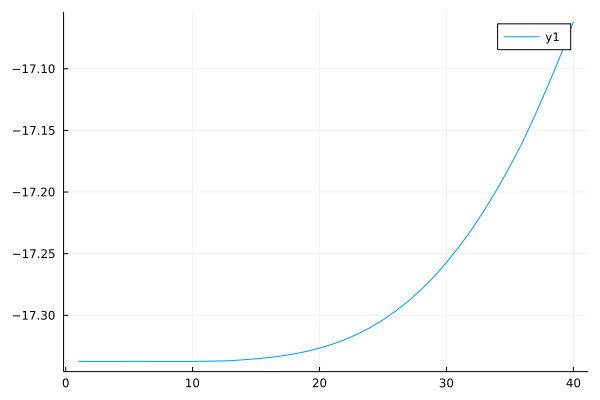

┌ Info: Precompiling GR_jll [d2c73de3-f751-5644-a686-071e5b155ba9]
└ @ Base loading.jl:1423
┌ Warning: Module Cairo_jll with build ID 349201218297556 is missing from the cache.
│ This may mean Cairo_jll [83423d85-b0ee-5818-9007-b63ccbeb887a] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1107
┌ Info: Skipping precompilation since __precompile__(false). Importing GR_jll [d2c73de3-f751-5644-a686-071e5b155ba9].
└ @ Base loading.jl:1124
┌ Info: Precompiling Qt5Base_jll [ea2cea3b-5b76-57ae-a6ef-0a8af62496e1]
└ @ Base loading.jl:1423
┌ Warning: Module Fontconfig_jll with build ID 349203755823667 is missing from the cache.
│ This may mean Fontconfig_jll [a3f928ae-7b40-5064-980b-68af3947d34b] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1107
┌ Info: Skipping precompilation since __precompile__(false). Importing Qt5Base_jll [ea2cea3b-5b76-57ae-a6ef-0a8af62496e1].
└ @ Base loading.jl:1124


In [155]:
plot(energies_ground, energies_t1 energies_t2 energies_t3 energies_t4 energies_t5 energies_t6

In [156]:
display(energies_ground)

40-element Vector{Any}:
 -17.33737605400575
 -17.33740487020998
 -17.337418456133072
 -17.337415584601096
 -17.337376325879166
 -17.33737605400575
 -17.337403836105224
 -17.337418456133022
 -17.337415584600905
 -17.33739258612745
 -17.337284472187918
 -17.33708924451954
 -17.33676751150621
   ⋮
 -17.26892995203632
 -17.257175653424063
 -17.244302944686513
 -17.23017520616588
 -17.214521086883128
 -17.19757412703656
 -17.179271370593515
 -17.159453914061086
 -17.13726418895807
 -17.113836626079966
 -17.08894685798302
 -17.06206120433742

In [164]:
println(energies_t6)

Any[-16.595597906424494, -16.59284842992846, -16.589617048201646, -16.585536109240998, -16.581544577272624, -16.595597906424494, -16.592840376183595, -16.58961785089535, -16.585536032757616, -16.58199812031938, -16.57729080427074, -16.573909892518856, -16.574009106963672, -16.56789571465427, -16.567148179723667, -16.565765525139962, -16.561946208576813, -16.558489030529017, -16.556577119468322, -16.55436421471482, -16.550257517118474, -16.546039413231377, -16.542713452895377, -16.538600262396695, -16.534154349143527, -16.527995403106853, -16.520849459287444, -16.51812419614894, -16.516312600090952, -16.51047302758495, -16.504513723106083, -16.50052367519742, -16.491843611645972, -16.482773689756037, -16.474326094455325, -16.464091741262838, -16.44815261028279, -16.433397122810568, -16.41526951490997, -16.39422511187473]
